<a href="https://colab.research.google.com/github/arduinojinarendra/arduino/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [3]:
data = pd.read_csv("/content/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40058 entries, 0 to 40057
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      40058 non-null  object 
 1   LV ActivePower (kW)            40058 non-null  float64
 2   Wind Speed (m/s)               40058 non-null  float64
 3   Theoretical_Power_Curve (KWh)  40057 non-null  float64
 4   Wind Direction (°)             40057 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.5+ MB


In [5]:
data.describe()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,40058.000000,40058.000000,40057.000000,40057.000000
mean,1270.172519,7.426780,1454.392273,122.845907
std,1305.081240,4.214701,1368.980140,94.512435
min,-2.471405,0.000000,0.000000,0.000000
25%,38.759906,4.037272,129.944457,48.529049
50%,761.010254,6.957306,996.958061,72.059334
75%,2419.158325,10.203550,2912.306442,202.347000
max,3618.732910,25.206011,3600.000000,359.987396


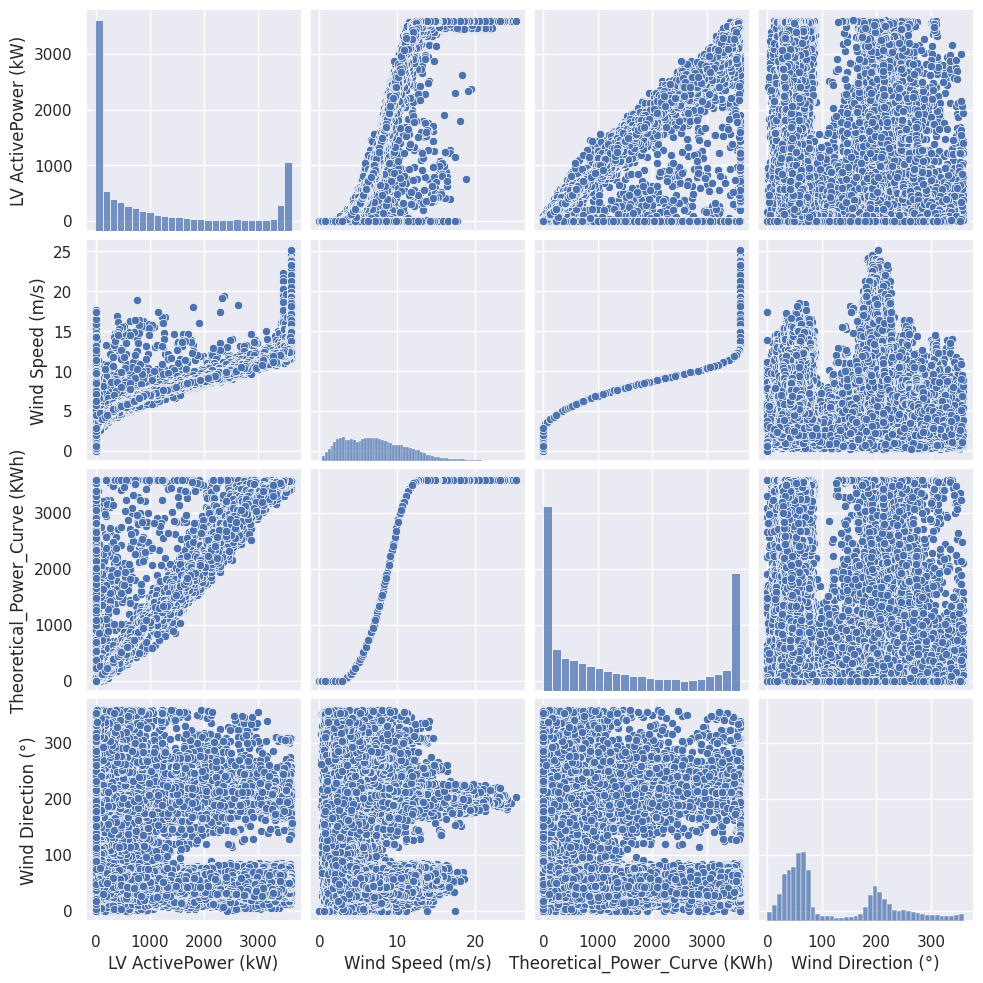

In [6]:
sns.pairplot(data)

<ipython-input-7-bec7d37a1fd2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


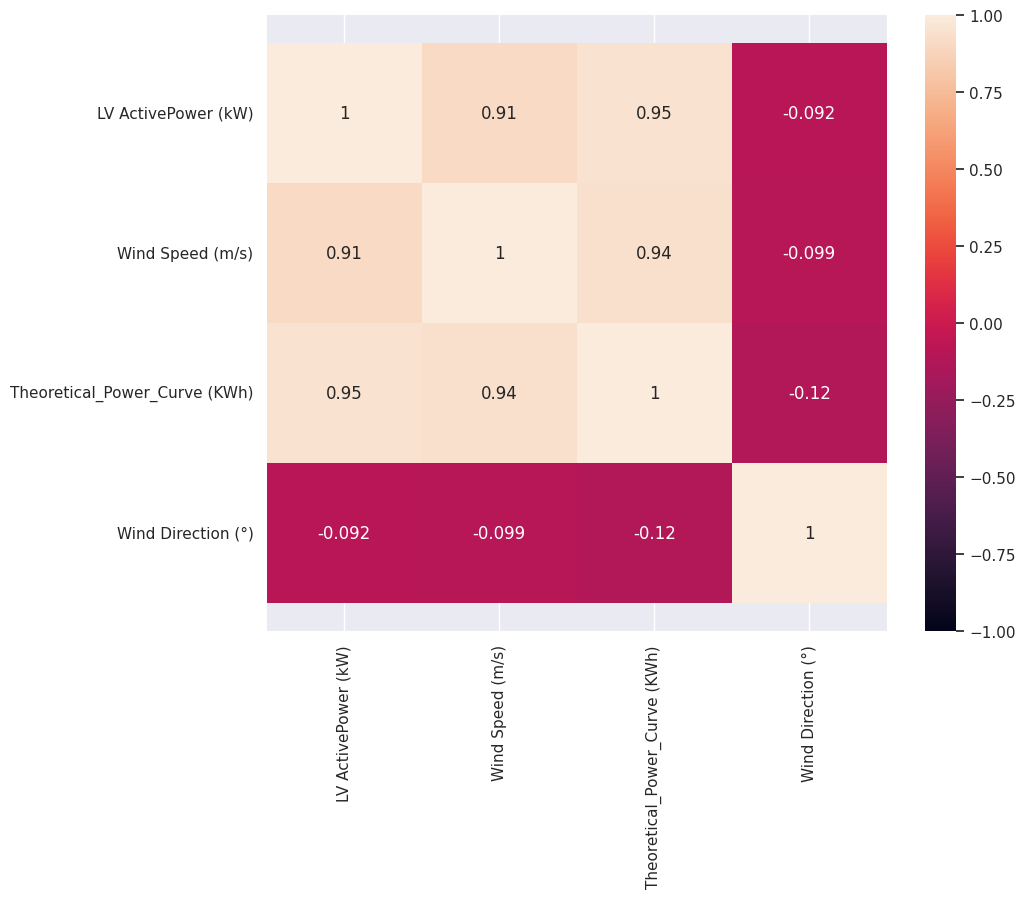

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912568,0.949768,-0.091916
Wind Speed (m/s),0.912568,1.000000,0.944400,-0.098718
Theoretical_Power_Curve (KWh),0.949768,0.944400,1.000000,-0.123748
Wind Direction (°),-0.091916,-0.098718,-0.123748,1.000000


In [7]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.2, top - 0.2)
plt.show()
corr

In [8]:
! pip install windrose

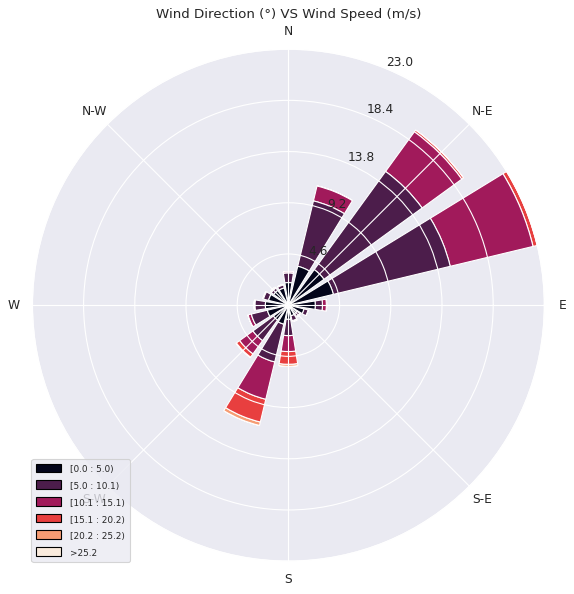

In [9]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [10]:
# Spliting the date time in year, month, days, hours and minutes
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data.head(10)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30


<ipython-input-11-f84c544678b2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
<ipython-input-11-f84c544678b2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
<ipython-input-11-f84c544678b2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
<ipython-input-11-f84c544678b2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)


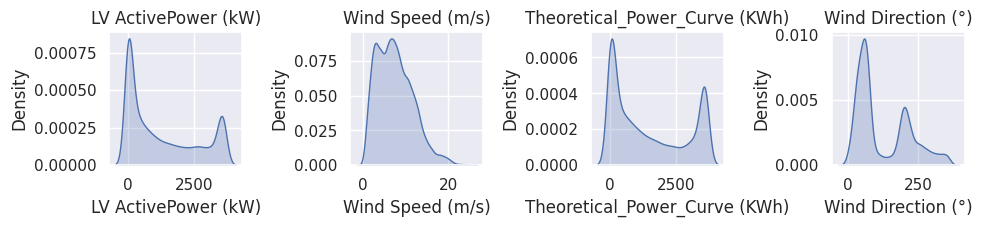

In [11]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [12]:
data = data.dropna()

In [13]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

<ipython-input-13-e8c354a12d6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
40052,2018-10-16 08:40:00,582.967285,5.955914,610.218822,43.217480,2018,10,16,8,40
40053,2018-10-16 08:50:00,633.733887,6.042651,638.471184,40.474682,2018,10,16,8,50
40054,2018-10-16 09:00:00,581.577576,5.921999,598.988280,42.242130,2018,10,16,9,0
40055,2018-10-16 09:10:00,712.034729,6.298405,729.366290,41.108971,2018,10,16,9,10


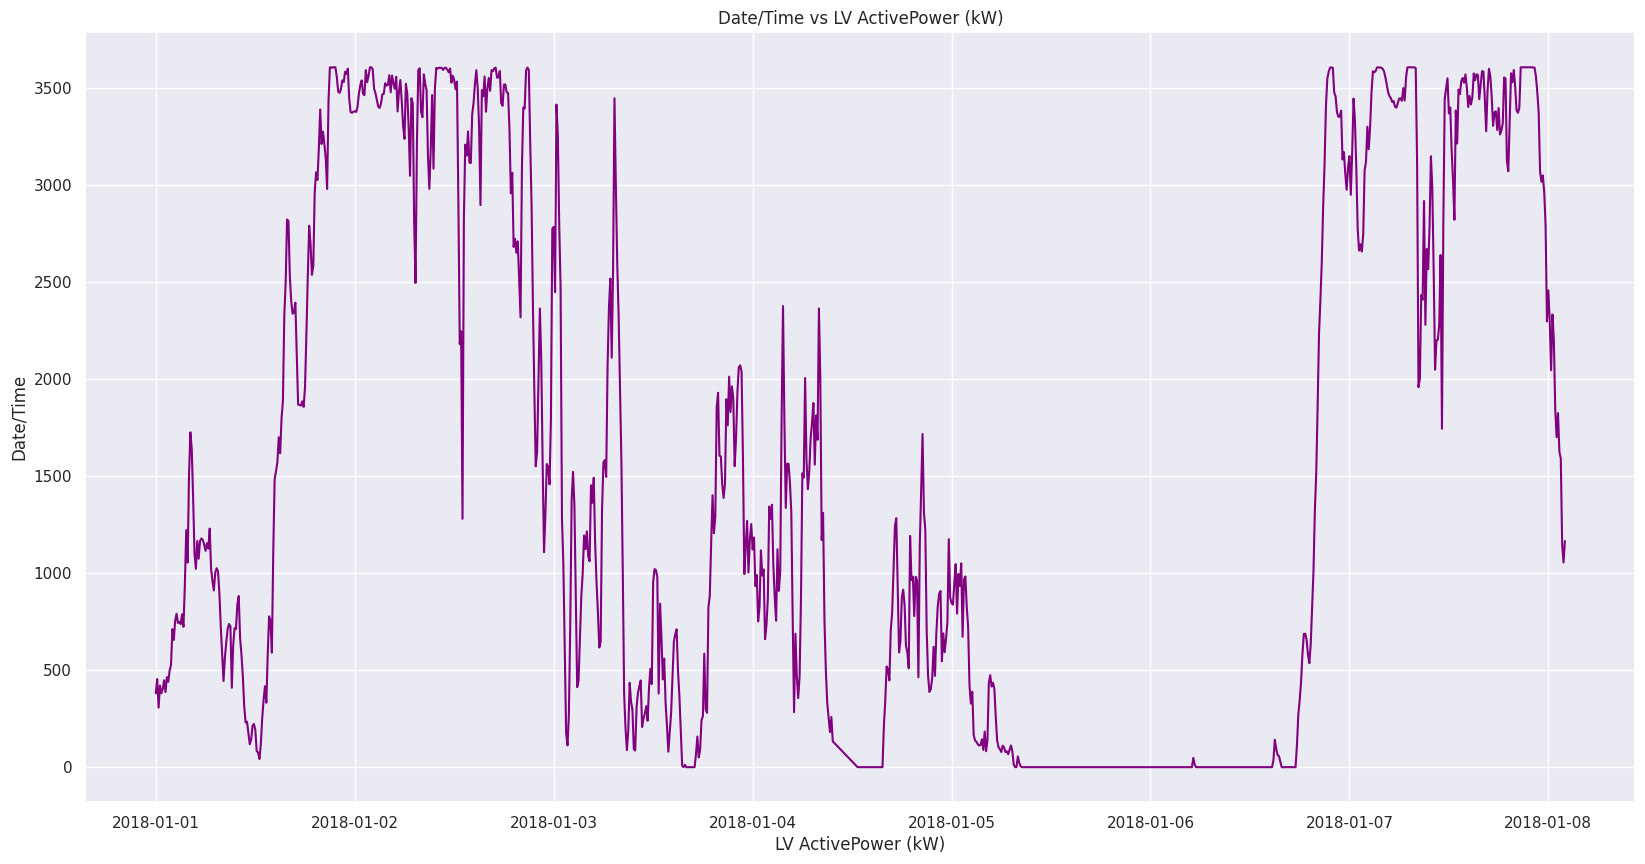

In [14]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['LV ActivePower (kW)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="LV ActivePower (kW)",
       ylabel="Date/Time",
       title="Date/Time vs LV ActivePower (kW)")

plt.show()

In [15]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()
df = data.copy()

In [16]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-16-66b0dd25839b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [17]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [18]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [19]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [20]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)


In [21]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [22]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [23]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [24]:
from keras.optimizers import Adam

def fit_lstm(train, batch_size, nb_epoch, neurons, learning_rate):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))

    # Create an optimizer with the specified learning rate
    optimizer = Adam(lr=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)

    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()

    return model
    # Specify the learning rate
learning_rate_exp = 0.001

In [25]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [26]:
'''Drop all the features as we will not be having any in production'''
del df['Wind Speed (m/s)']
del df['LV ActivePower (kW)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [27]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-10-16 07:00:00,381.483770
2018-10-16 07:10:00,125.148086
2018-10-16 07:20:00,185.554360
2018-10-16 07:30:00,244.392053
2018-10-16 07:40:00,347.017677


In [28]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [29]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [30]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [31]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [33]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp, learning_rate_exp)


39046/39046 [==============================] - 133s 3ms/step - loss: 0.0053


In [34]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 0s 344ms/step
Hour=1, Predicted=3462.617950, Expected=3371.899491
1/1 [==============================] - 0s 26ms/step
Hour=2, Predicted=3355.171210, Expected=3396.585979
1/1 [==============================] - 0s 25ms/step
Hour=3, Predicted=3443.944058, Expected=2561.955818


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=4, Predicted=2563.371188, Expected=2323.823740
1/1 [==============================] - 0s 25ms/step
Hour=5, Predicted=2341.484709, Expected=1800.904422
1/1 [==============================] - 0s 26ms/step
Hour=6, Predicted=1773.559998, Expected=2148.697006


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=7, Predicted=2249.870587, Expected=2227.045923
1/1 [==============================] - 0s 30ms/step
Hour=8, Predicted=2251.446364, Expected=3052.976101
1/1 [==============================] - 0s 23ms/step
Hour=9, Predicted=3036.651323, Expected=2700.977462


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=10, Predicted=2793.467835, Expected=2865.631294
1/1 [==============================] - 0s 29ms/step
Hour=11, Predicted=2948.801827, Expected=2723.175439
1/1 [==============================] - 0s 22ms/step
Hour=12, Predicted=2727.176963, Expected=3475.876259


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=13, Predicted=3485.812635, Expected=3171.680592
1/1 [==============================] - 0s 29ms/step
Hour=14, Predicted=3284.629352, Expected=3173.423847
1/1 [==============================] - 0s 24ms/step
Hour=15, Predicted=3170.112415, Expected=3338.476096


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=16, Predicted=3352.007230, Expected=3015.545694
1/1 [==============================] - 0s 23ms/step
Hour=17, Predicted=3024.061347, Expected=2905.238787
1/1 [==============================] - 0s 28ms/step
Hour=18, Predicted=2906.021068, Expected=2619.867989


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 31ms/step
Hour=19, Predicted=2618.337916, Expected=3036.581808
1/1 [==============================] - 0s 29ms/step
Hour=20, Predicted=3048.737192, Expected=3260.492869
1/1 [==============================] - 0s 28ms/step
Hour=21, Predicted=3266.730290, Expected=3278.005827


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=22, Predicted=3281.473383, Expected=2946.473710
1/1 [==============================] - 0s 27ms/step
Hour=23, Predicted=2952.095124, Expected=2387.348208
1/1 [==============================] - 0s 25ms/step
Hour=24, Predicted=2400.712346, Expected=2952.907752


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 26ms/step
Hour=25, Predicted=2963.885095, Expected=2576.456726
1/1 [==============================] - 0s 26ms/step
Hour=26, Predicted=2589.830887, Expected=2954.978801
1/1 [==============================] - 0s 16ms/step
Hour=27, Predicted=2971.619015, Expected=2870.348149


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 18ms/step
Hour=28, Predicted=2883.862116, Expected=3294.972732
1/1 [==============================] - 0s 16ms/step
Hour=29, Predicted=3308.068479, Expected=2746.379490
1/1 [==============================] - 0s 16ms/step
Hour=30, Predicted=2761.087512, Expected=2885.322817
1/1 [==============================] - 0s 16ms/step
Hour=31, Predicted=2902.100521, Expected=1497.846094


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=32, Predicted=1510.740857, Expected=2307.525744
1/1 [==============================] - 0s 16ms/step
Hour=33, Predicted=2322.725568, Expected=3110.805119
1/1 [==============================] - 0s 17ms/step
Hour=34, Predicted=3125.690430, Expected=2757.460360
1/1 [==============================] - 0s 17ms/step
Hour=35, Predicted=2772.591047, Expected=2996.539558


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=36, Predicted=3011.674094, Expected=3222.654348
1/1 [==============================] - 0s 18ms/step
Hour=37, Predicted=3238.606489, Expected=3048.726440
1/1 [==============================] - 0s 16ms/step
Hour=38, Predicted=3065.334988, Expected=2793.779550
1/1 [==============================] - 0s 16ms/step
Hour=39, Predicted=2810.277196, Expected=2230.110035


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=40, Predicted=2247.345587, Expected=2072.909212
1/1 [==============================] - 0s 15ms/step
Hour=41, Predicted=2090.256530, Expected=2182.333383
1/1 [==============================] - 0s 16ms/step
Hour=42, Predicted=2199.441035, Expected=2000.230608
1/1 [==============================] - 0s 16ms/step
Hour=43, Predicted=2017.375021, Expected=2457.404743


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=44, Predicted=2474.515956, Expected=2724.216948
1/1 [==============================] - 0s 16ms/step
Hour=45, Predicted=2741.012079, Expected=3075.459190
1/1 [==============================] - 0s 17ms/step
Hour=46, Predicted=3092.180725, Expected=2469.911550
1/1 [==============================] - 0s 21ms/step
Hour=47, Predicted=2486.509467, Expected=2119.842686


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=48, Predicted=2136.319885, Expected=2898.367899
1/1 [==============================] - 0s 16ms/step
Hour=49, Predicted=2914.612913, Expected=2268.209458
1/1 [==============================] - 0s 17ms/step
Hour=50, Predicted=2284.501467, Expected=2655.528735
1/1 [==============================] - 0s 17ms/step
Hour=51, Predicted=2671.724932, Expected=3006.727873


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=52, Predicted=3022.877139, Expected=2993.847164
1/1 [==============================] - 0s 16ms/step
Hour=53, Predicted=3009.953501, Expected=2695.024826
1/1 [==============================] - 0s 16ms/step
Hour=54, Predicted=2711.127035, Expected=3241.885114
1/1 [==============================] - 0s 16ms/step
Hour=55, Predicted=3257.968749, Expected=2994.027912


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=56, Predicted=3010.070000, Expected=2669.138382
1/1 [==============================] - 0s 17ms/step
Hour=57, Predicted=2685.200885, Expected=2709.216684
1/1 [==============================] - 0s 16ms/step
Hour=58, Predicted=2725.243716, Expected=3129.238404
1/1 [==============================] - 0s 18ms/step
Hour=59, Predicted=3145.247633, Expected=3096.604519


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=60, Predicted=3112.598814, Expected=3018.608682
1/1 [==============================] - 0s 16ms/step
Hour=61, Predicted=3034.588090, Expected=3010.444617
1/1 [==============================] - 0s 17ms/step
Hour=62, Predicted=3026.408733, Expected=3463.669194
1/1 [==============================] - 0s 17ms/step
Hour=63, Predicted=3479.632015, Expected=3413.319164


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=64, Predicted=3429.285908, Expected=3360.882669
1/1 [==============================] - 0s 16ms/step
Hour=65, Predicted=3376.856635, Expected=3476.083511
1/1 [==============================] - 0s 16ms/step
Hour=66, Predicted=3492.066249, Expected=3553.101163
1/1 [==============================] - 0s 22ms/step
Hour=67, Predicted=3569.103286, Expected=3595.056221


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=68, Predicted=3611.069945, Expected=3590.094080
1/1 [==============================] - 0s 16ms/step
Hour=69, Predicted=3606.121482, Expected=3596.217060
1/1 [==============================] - 0s 16ms/step
Hour=70, Predicted=3612.257647, Expected=3582.186945
1/1 [==============================] - 0s 16ms/step
Hour=71, Predicted=3598.238997, Expected=3576.741047


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=72, Predicted=3592.801715, Expected=3489.947687
1/1 [==============================] - 0s 15ms/step
Hour=73, Predicted=3506.014662, Expected=3546.607539
1/1 [==============================] - 0s 16ms/step
Hour=74, Predicted=3562.681644, Expected=3591.652280
1/1 [==============================] - 0s 16ms/step
Hour=75, Predicted=3607.728953, Expected=3586.821857


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=76, Predicted=3602.901927, Expected=3597.721863
1/1 [==============================] - 0s 17ms/step
Hour=77, Predicted=3613.803657, Expected=3592.004410
1/1 [==============================] - 0s 16ms/step
Hour=78, Predicted=3608.087415, Expected=3580.937496
1/1 [==============================] - 0s 16ms/step
Hour=79, Predicted=3597.020953, Expected=3506.369339


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=80, Predicted=3522.453152, Expected=3558.553873
1/1 [==============================] - 0s 18ms/step
Hour=81, Predicted=3574.637933, Expected=3573.649414
1/1 [==============================] - 0s 19ms/step
Hour=82, Predicted=3589.733254, Expected=3560.640484
1/1 [==============================] - 0s 16ms/step
Hour=83, Predicted=3576.724149, Expected=3539.820152


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=84, Predicted=3555.903542, Expected=3583.832167
1/1 [==============================] - 0s 16ms/step
Hour=85, Predicted=3599.914715, Expected=3568.682936
1/1 [==============================] - 0s 17ms/step
Hour=86, Predicted=3584.764576, Expected=3586.576093
1/1 [==============================] - 0s 15ms/step
Hour=87, Predicted=3602.656604, Expected=3574.725188


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=88, Predicted=3590.804374, Expected=3551.087136
1/1 [==============================] - 0s 17ms/step
Hour=89, Predicted=3567.164911, Expected=3544.191564
1/1 [==============================] - 0s 17ms/step
Hour=90, Predicted=3560.267944, Expected=3515.207251
1/1 [==============================] - 0s 17ms/step
Hour=91, Predicted=3531.282413, Expected=3592.409644


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=92, Predicted=3608.483568, Expected=3546.752509
1/1 [==============================] - 0s 15ms/step
Hour=93, Predicted=3562.825497, Expected=3543.864019
1/1 [==============================] - 0s 16ms/step
Hour=94, Predicted=3559.936178, Expected=3581.879664
1/1 [==============================] - 0s 16ms/step
Hour=95, Predicted=3597.951194, Expected=3562.858062


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=96, Predicted=3578.929114, Expected=3563.257492
1/1 [==============================] - 0s 16ms/step
Hour=97, Predicted=3579.328237, Expected=3572.945578
1/1 [==============================] - 0s 16ms/step
Hour=98, Predicted=3589.016127, Expected=3520.309311
1/1 [==============================] - 0s 16ms/step
Hour=99, Predicted=3536.379756, Expected=3529.972558


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=100, Predicted=3546.042993, Expected=3499.264443
1/1 [==============================] - 0s 16ms/step
Hour=101, Predicted=3515.334928, Expected=3456.183288
1/1 [==============================] - 0s 16ms/step
Hour=102, Predicted=3472.253861, Expected=3373.801743
1/1 [==============================] - 0s 15ms/step
Hour=103, Predicted=3389.872438, Expected=3262.265012


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=104, Predicted=3278.335836, Expected=3086.839647
1/1 [==============================] - 0s 20ms/step
Hour=105, Predicted=3102.910619, Expected=3020.272101
1/1 [==============================] - 0s 16ms/step
Hour=106, Predicted=3036.343215, Expected=3059.807161
1/1 [==============================] - 0s 16ms/step
Hour=107, Predicted=3075.878428, Expected=3140.607184


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=108, Predicted=3156.678597, Expected=3204.733542
1/1 [==============================] - 0s 16ms/step
Hour=109, Predicted=3220.805101, Expected=2856.191681
1/1 [==============================] - 0s 15ms/step
Hour=110, Predicted=2872.263397, Expected=3381.551786
1/1 [==============================] - 0s 16ms/step
Hour=111, Predicted=3397.623636, Expected=3236.988325


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=112, Predicted=3253.060296, Expected=2853.076548
1/1 [==============================] - 0s 15ms/step
Hour=113, Predicted=2869.148628, Expected=2888.355462
1/1 [==============================] - 0s 16ms/step
Hour=114, Predicted=2904.427644, Expected=2933.253016
1/1 [==============================] - 0s 16ms/step
Hour=115, Predicted=2949.325273, Expected=2713.177534


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=116, Predicted=2729.249852, Expected=2842.966699
1/1 [==============================] - 0s 16ms/step
Hour=117, Predicted=2859.039059, Expected=2302.842258
1/1 [==============================] - 0s 16ms/step
Hour=118, Predicted=2318.914651, Expected=2395.231166
1/1 [==============================] - 0s 16ms/step
Hour=119, Predicted=2411.303566, Expected=2726.536601


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=120, Predicted=2742.609015, Expected=2758.969907
1/1 [==============================] - 0s 16ms/step
Hour=121, Predicted=2775.042310, Expected=2591.549341
1/1 [==============================] - 0s 16ms/step
Hour=122, Predicted=2607.621729, Expected=2956.991898
1/1 [==============================] - 0s 16ms/step
Hour=123, Predicted=2973.064271, Expected=3233.408824


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=124, Predicted=3249.481179, Expected=3204.555437
1/1 [==============================] - 0s 16ms/step
Hour=125, Predicted=3220.627773, Expected=2727.151911
1/1 [==============================] - 0s 16ms/step
Hour=126, Predicted=2743.224222, Expected=3142.743687
1/1 [==============================] - 0s 17ms/step
Hour=127, Predicted=3158.815969, Expected=3043.458069


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=128, Predicted=3059.530332, Expected=2943.059632
1/1 [==============================] - 0s 16ms/step
Hour=129, Predicted=2959.131876, Expected=3010.393803
1/1 [==============================] - 0s 18ms/step
Hour=130, Predicted=3026.466037, Expected=1733.445740
1/1 [==============================] - 0s 16ms/step
Hour=131, Predicted=1749.517959, Expected=1877.095060


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=132, Predicted=1893.167257, Expected=2481.624317
1/1 [==============================] - 0s 16ms/step
Hour=133, Predicted=2497.696509, Expected=2835.133511
1/1 [==============================] - 0s 21ms/step
Hour=134, Predicted=2851.205680, Expected=2589.328066
1/1 [==============================] - 0s 16ms/step
Hour=135, Predicted=2605.400234, Expected=1786.124429


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=136, Predicted=1802.196587, Expected=1620.281948
1/1 [==============================] - 0s 17ms/step
Hour=137, Predicted=1636.354103, Expected=1628.463260
1/1 [==============================] - 0s 16ms/step
Hour=138, Predicted=1644.535411, Expected=2227.101031
1/1 [==============================] - 0s 16ms/step
Hour=139, Predicted=2243.173180, Expected=2582.989957


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=140, Predicted=2599.062112, Expected=3005.591227
1/1 [==============================] - 0s 16ms/step
Hour=141, Predicted=3021.663382, Expected=3337.811767
1/1 [==============================] - 0s 16ms/step
Hour=142, Predicted=3353.883923, Expected=2531.650602
1/1 [==============================] - 0s 23ms/step
Hour=143, Predicted=2547.722759, Expected=2952.708477


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=144, Predicted=2968.780636, Expected=2228.950073
1/1 [==============================] - 0s 19ms/step
Hour=145, Predicted=2245.022235, Expected=2332.340447
1/1 [==============================] - 0s 20ms/step
Hour=146, Predicted=2348.412609, Expected=2493.909658
1/1 [==============================] - 0s 17ms/step
Hour=147, Predicted=2509.981824, Expected=2673.706584


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=148, Predicted=2689.778756, Expected=2493.838038
1/1 [==============================] - 0s 16ms/step
Hour=149, Predicted=2509.910206, Expected=2906.230132
1/1 [==============================] - 0s 16ms/step
Hour=150, Predicted=2922.302305, Expected=2445.203115
1/1 [==============================] - 0s 16ms/step
Hour=151, Predicted=2461.275287, Expected=2448.666061


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=152, Predicted=2464.738239, Expected=2434.845886
1/1 [==============================] - 0s 20ms/step
Hour=153, Predicted=2450.918065, Expected=3130.154241
1/1 [==============================] - 0s 16ms/step
Hour=154, Predicted=3146.226414, Expected=2868.164266
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=155, Predicted=2884.236446, Expected=3107.821571
1/1 [==============================] - 0s 17ms/step
Hour=156, Predicted=3123.893758, Expected=3388.578435
1/1 [==============================] - 0s 18ms/step
Hour=157, Predicted=3404.650619, Expected=3239.612091
1/1 [==============================] - 0s 20ms/step
Hour=158, Predicted=3255.684275, Expected=3144.662503


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=159, Predicted=3160.734689, Expected=2454.077219
1/1 [==============================] - 0s 20ms/step
Hour=160, Predicted=2470.149405, Expected=3005.886946
1/1 [==============================] - 0s 18ms/step
Hour=161, Predicted=3021.959130, Expected=2984.572979
1/1 [==============================] - 0s 17ms/step
Hour=162, Predicted=3000.645164, Expected=3003.006522


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=163, Predicted=3019.078706, Expected=2454.151526
1/1 [==============================] - 0s 16ms/step
Hour=164, Predicted=2470.223710, Expected=3375.050826
1/1 [==============================] - 0s 16ms/step
Hour=165, Predicted=3391.123010, Expected=3328.467677
1/1 [==============================] - 0s 29ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=166, Predicted=3344.539861, Expected=3408.136021
1/1 [==============================] - 0s 16ms/step
Hour=167, Predicted=3424.208203, Expected=3226.591533
1/1 [==============================] - 0s 18ms/step
Hour=168, Predicted=3242.663720, Expected=3522.176859
1/1 [==============================] - 0s 16ms/step
Hour=169, Predicted=3538.249038, Expected=3524.284608
1/1 [==============================] - 0s 16ms/step
Hour=170, Predicted=3540.356790, Expected=3547.427719


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=171, Predicted=3563.499906, Expected=3165.829702
1/1 [==============================] - 0s 16ms/step
Hour=172, Predicted=3181.901878, Expected=2965.302345
1/1 [==============================] - 0s 16ms/step
Hour=173, Predicted=2981.374527, Expected=3366.766917
1/1 [==============================] - 0s 16ms/step
Hour=174, Predicted=3382.839098, Expected=3298.371770


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=175, Predicted=3314.443942, Expected=3471.530046
1/1 [==============================] - 0s 17ms/step
Hour=176, Predicted=3487.602219, Expected=3459.728149
1/1 [==============================] - 0s 17ms/step
Hour=177, Predicted=3475.800329, Expected=3467.484248
1/1 [==============================] - 0s 16ms/step
Hour=178, Predicted=3483.556423, Expected=3461.911879


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=179, Predicted=3477.984054, Expected=3411.090652
1/1 [==============================] - 0s 16ms/step
Hour=180, Predicted=3427.162824, Expected=3344.755792
1/1 [==============================] - 0s 16ms/step
Hour=181, Predicted=3360.827967, Expected=3525.756933
1/1 [==============================] - 0s 16ms/step
Hour=182, Predicted=3541.829108, Expected=3169.907928


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=183, Predicted=3185.980106, Expected=3272.311340
1/1 [==============================] - 0s 15ms/step
Hour=184, Predicted=3288.383515, Expected=3234.726394
1/1 [==============================] - 0s 16ms/step
Hour=185, Predicted=3250.798569, Expected=3236.055799
1/1 [==============================] - 0s 17ms/step
Hour=186, Predicted=3252.127976, Expected=3004.156539


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 22ms/step
Hour=187, Predicted=3020.228714, Expected=2115.379328
1/1 [==============================] - 0s 25ms/step
Hour=188, Predicted=2131.451503, Expected=3187.558504
1/1 [==============================] - 0s 27ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=189, Predicted=3203.630676, Expected=2494.390458
1/1 [==============================] - 0s 29ms/step
Hour=190, Predicted=2510.462633, Expected=2678.096867
1/1 [==============================] - 0s 23ms/step
Hour=191, Predicted=2694.169039, Expected=2971.505497
1/1 [==============================] - 0s 27ms/step
Hour=192, Predicted=2987.577672, Expected=2794.847345


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=193, Predicted=2810.919521, Expected=3072.394581
1/1 [==============================] - 0s 35ms/step
Hour=194, Predicted=3088.466753, Expected=2819.333988
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 38ms/step
Hour=195, Predicted=2835.406164, Expected=2701.911094
1/1 [==============================] - 0s 30ms/step
Hour=196, Predicted=2717.983269, Expected=2464.255561
1/1 [==============================] - 0s 24ms/step
Hour=197, Predicted=2480.327736, Expected=2607.541692


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=198, Predicted=2623.613874, Expected=3480.008137
1/1 [==============================] - 0s 25ms/step
Hour=199, Predicted=3496.080312, Expected=3451.948849
1/1 [==============================] - 0s 25ms/step
Hour=200, Predicted=3468.021024, Expected=2769.681378


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=201, Predicted=2785.753553, Expected=3135.849315
1/1 [==============================] - 0s 28ms/step
Hour=202, Predicted=3151.921490, Expected=3177.301499
1/1 [==============================] - 0s 26ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=203, Predicted=3193.373674, Expected=3216.625674
1/1 [==============================] - 0s 29ms/step
Hour=204, Predicted=3232.697856, Expected=3418.326047
1/1 [==============================] - 0s 27ms/step
Hour=205, Predicted=3434.398222, Expected=3212.429684
1/1 [==============================] - 0s 30ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=206, Predicted=3228.501860, Expected=3137.271553
1/1 [==============================] - 0s 25ms/step
Hour=207, Predicted=3153.343740, Expected=3312.594255
1/1 [==============================] - 0s 26ms/step
Hour=208, Predicted=3328.666427, Expected=3334.913604
1/1 [==============================] - 0s 26ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=209, Predicted=3350.985778, Expected=3563.611704
1/1 [==============================] - 0s 33ms/step
Hour=210, Predicted=3579.683886, Expected=2780.640422
1/1 [==============================] - 0s 23ms/step
Hour=211, Predicted=2796.712594, Expected=3006.019698


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 41ms/step
Hour=212, Predicted=3022.091872, Expected=2890.751278
1/1 [==============================] - 0s 36ms/step
Hour=213, Predicted=2906.823460, Expected=2825.846099


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 33ms/step
Hour=214, Predicted=2841.918273, Expected=2846.542146
1/1 [==============================] - 0s 62ms/step
Hour=215, Predicted=2862.614322, Expected=3233.843292


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 19ms/step
Hour=216, Predicted=3249.915474, Expected=3056.906924
1/1 [==============================] - 0s 17ms/step
Hour=217, Predicted=3072.979100, Expected=3065.168002
1/1 [==============================] - 0s 20ms/step
Hour=218, Predicted=3081.240177, Expected=3168.268569
1/1 [==============================] - 0s 19ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=219, Predicted=3184.340753, Expected=3374.269439
1/1 [==============================] - 0s 16ms/step
Hour=220, Predicted=3390.341611, Expected=3075.355344
1/1 [==============================] - 0s 17ms/step
Hour=221, Predicted=3091.427517, Expected=3146.042061
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=222, Predicted=3162.114243, Expected=3473.194774
1/1 [==============================] - 0s 16ms/step
Hour=223, Predicted=3489.266946, Expected=3511.161666
1/1 [==============================] - 0s 17ms/step
Hour=224, Predicted=3527.233842, Expected=3484.301997
1/1 [==============================] - 0s 17ms/step
Hour=225, Predicted=3500.374176, Expected=3253.377575
1/1 [==============================] - 0s 16ms/step
Hour=226, Predicted=3269.449751, Expected=3161.141808


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=227, Predicted=3177.213990, Expected=2960.338449
1/1 [==============================] - 0s 16ms/step
Hour=228, Predicted=2976.410628, Expected=2447.893004
1/1 [==============================] - 0s 16ms/step
Hour=229, Predicted=2463.965179, Expected=2701.357225
1/1 [==============================] - 0s 16ms/step
Hour=230, Predicted=2717.429407, Expected=2811.936500


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=231, Predicted=2828.008679, Expected=2223.292299
1/1 [==============================] - 0s 16ms/step
Hour=232, Predicted=2239.364475, Expected=2670.986830
1/1 [==============================] - 0s 16ms/step
Hour=233, Predicted=2687.059012, Expected=2575.701860
1/1 [==============================] - 0s 16ms/step
Hour=234, Predicted=2591.774041, Expected=2146.906062


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 21ms/step
Hour=235, Predicted=2162.978238, Expected=2844.603999
1/1 [==============================] - 0s 16ms/step
Hour=236, Predicted=2860.676181, Expected=2959.899960
1/1 [==============================] - 0s 18ms/step
Hour=237, Predicted=2975.972140, Expected=3300.966265
1/1 [==============================] - 0s 18ms/step
Hour=238, Predicted=3317.038440, Expected=3224.735201


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=239, Predicted=3240.807383, Expected=3099.676638
1/1 [==============================] - 0s 17ms/step
Hour=240, Predicted=3115.748819, Expected=3080.627932
1/1 [==============================] - 0s 16ms/step
Hour=241, Predicted=3096.700110, Expected=2920.039280
1/1 [==============================] - 0s 16ms/step
Hour=242, Predicted=2936.111462, Expected=3048.682841


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=243, Predicted=3064.755015, Expected=2910.843805
1/1 [==============================] - 0s 16ms/step
Hour=244, Predicted=2926.915981, Expected=2586.214709
1/1 [==============================] - 0s 16ms/step
Hour=245, Predicted=2602.286891, Expected=2412.950264
1/1 [==============================] - 0s 16ms/step
Hour=246, Predicted=2429.022442, Expected=2465.642227


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 20ms/step
Hour=247, Predicted=2481.714409, Expected=2136.383742
1/1 [==============================] - 0s 16ms/step
Hour=248, Predicted=2152.455914, Expected=1945.751146
1/1 [==============================] - 0s 16ms/step
Hour=249, Predicted=1961.823321, Expected=1959.935967
1/1 [==============================] - 0s 15ms/step
Hour=250, Predicted=1976.008149, Expected=1744.570277


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=251, Predicted=1760.642453, Expected=1508.859559
1/1 [==============================] - 0s 20ms/step
Hour=252, Predicted=1524.931734, Expected=2413.369875
1/1 [==============================] - 0s 19ms/step
Hour=253, Predicted=2429.442051, Expected=1375.355969
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=254, Predicted=1391.428144, Expected=1293.051461
1/1 [==============================] - 0s 16ms/step
Hour=255, Predicted=1309.123637, Expected=1523.037964
1/1 [==============================] - 0s 16ms/step
Hour=256, Predicted=1539.110139, Expected=1517.602511
1/1 [==============================] - 0s 16ms/step
Hour=257, Predicted=1533.674688, Expected=1912.852261
1/1 [==============================] - 0s 16ms/step
Hour=258, Predicted=1928.924433, Expected=1995.883625


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=259, Predicted=2011.955800, Expected=1822.534806
1/1 [==============================] - 0s 17ms/step
Hour=260, Predicted=1838.606982, Expected=1900.770319
1/1 [==============================] - 0s 16ms/step
Hour=261, Predicted=1916.842495, Expected=1736.411713
1/1 [==============================] - 0s 16ms/step
Hour=262, Predicted=1752.483888, Expected=1832.950018


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 22ms/step
Hour=263, Predicted=1849.022193, Expected=2058.884180
1/1 [==============================] - 0s 16ms/step
Hour=264, Predicted=2074.956355, Expected=1954.196442
1/1 [==============================] - 0s 16ms/step
Hour=265, Predicted=1970.268617, Expected=1704.299987
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=266, Predicted=1720.372163, Expected=1886.627234
1/1 [==============================] - 0s 20ms/step
Hour=267, Predicted=1902.699409, Expected=1563.835002
1/1 [==============================] - 0s 20ms/step
Hour=268, Predicted=1579.907178, Expected=2356.167092
1/1 [==============================] - 0s 23ms/step
Hour=269, Predicted=2372.239267, Expected=1374.908665


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=270, Predicted=1390.980841, Expected=1288.098237
1/1 [==============================] - 0s 16ms/step
Hour=271, Predicted=1304.170412, Expected=1408.915740
1/1 [==============================] - 0s 16ms/step
Hour=272, Predicted=1424.987915, Expected=1329.345926
1/1 [==============================] - 0s 18ms/step
Hour=273, Predicted=1345.418101, Expected=1300.386244


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 19ms/step
Hour=274, Predicted=1316.458419, Expected=1095.271200
1/1 [==============================] - 0s 22ms/step
Hour=275, Predicted=1111.343382, Expected=815.119440
1/1 [==============================] - 0s 18ms/step
Hour=276, Predicted=831.191615, Expected=681.889805
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=277, Predicted=697.961981, Expected=799.627017
1/1 [==============================] - 0s 27ms/step
Hour=278, Predicted=815.699192, Expected=695.379273
1/1 [==============================] - 0s 18ms/step
Hour=279, Predicted=711.451448, Expected=939.693659
1/1 [==============================] - 0s 19ms/step
Hour=280, Predicted=955.765834, Expected=913.765699


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=281, Predicted=929.837875, Expected=693.439305
1/1 [==============================] - 0s 21ms/step
Hour=282, Predicted=709.511481, Expected=946.286310
1/1 [==============================] - 0s 17ms/step
Hour=283, Predicted=962.358485, Expected=655.399000
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=284, Predicted=671.471176, Expected=695.178270
1/1 [==============================] - 0s 21ms/step
Hour=285, Predicted=711.250446, Expected=1400.772108
1/1 [==============================] - 0s 22ms/step
Hour=286, Predicted=1416.844283, Expected=1603.324179
1/1 [==============================] - 0s 20ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=287, Predicted=1619.396358, Expected=1343.409435
1/1 [==============================] - 0s 17ms/step
Hour=288, Predicted=1359.481610, Expected=1731.482970
1/1 [==============================] - 0s 17ms/step
Hour=289, Predicted=1747.555145, Expected=2469.301193
1/1 [==============================] - 0s 18ms/step
Hour=290, Predicted=2485.373375, Expected=2286.966469
1/1 [==============================] - 0s 17ms/step
Hour=291, Predicted=2303.038644, Expected=2372.589706


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=292, Predicted=2388.661881, Expected=2287.277956
1/1 [==============================] - 0s 17ms/step
Hour=293, Predicted=2303.350131, Expected=2728.425926
1/1 [==============================] - 0s 17ms/step
Hour=294, Predicted=2744.498102, Expected=2167.383274
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=295, Predicted=2183.455460, Expected=1924.279662
1/1 [==============================] - 0s 20ms/step
Hour=296, Predicted=1940.351839, Expected=1158.335662
1/1 [==============================] - 0s 18ms/step
Hour=297, Predicted=1174.407834, Expected=1219.568019
1/1 [==============================] - 0s 17ms/step
Hour=298, Predicted=1235.640196, Expected=796.771228
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=299, Predicted=812.843408, Expected=1195.886053
1/1 [==============================] - 0s 18ms/step
Hour=300, Predicted=1211.958228, Expected=1884.046692
1/1 [==============================] - 0s 19ms/step
Hour=301, Predicted=1900.118867, Expected=1135.749481
1/1 [==============================] - 0s 18ms/step
Hour=302, Predicted=1151.821662, Expected=1194.990174
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=303, Predicted=1211.062354, Expected=946.989880
1/1 [==============================] - 0s 17ms/step
Hour=304, Predicted=963.062054, Expected=1919.441966
1/1 [==============================] - 0s 16ms/step
Hour=305, Predicted=1935.514139, Expected=2068.617505
1/1 [==============================] - 0s 16ms/step
Hour=306, Predicted=2084.689678, Expected=2121.333790
1/1 [==============================] - 0s 16ms/step
Hour=307, Predicted=2137.405966, Expected=1035.099371


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 22ms/step
Hour=308, Predicted=1051.171546, Expected=1291.981735
1/1 [==============================] - 0s 17ms/step
Hour=309, Predicted=1308.053917, Expected=1587.059333
1/1 [==============================] - 0s 18ms/step
Hour=310, Predicted=1603.131508, Expected=1061.123043
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=311, Predicted=1077.195219, Expected=2401.558511
1/1 [==============================] - 0s 18ms/step
Hour=312, Predicted=2417.630686, Expected=1102.771199
1/1 [==============================] - 0s 18ms/step
Hour=313, Predicted=1118.843374, Expected=857.073849
1/1 [==============================] - 0s 16ms/step
Hour=314, Predicted=873.146028, Expected=873.620973
1/1 [==============================] - 0s 16ms/step
Hour=315, Predicted=889.693148, Expected=993.677985


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=316, Predicted=1009.750160, Expected=681.821581
1/1 [==============================] - 0s 17ms/step
Hour=317, Predicted=697.893758, Expected=401.535201
1/1 [==============================] - 0s 17ms/step
Hour=318, Predicted=417.607377, Expected=288.473915
1/1 [==============================] - 0s 16ms/step
Hour=319, Predicted=304.546090, Expected=643.477860


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=320, Predicted=659.550035, Expected=466.755985
1/1 [==============================] - 0s 16ms/step
Hour=321, Predicted=482.828160, Expected=267.295807
1/1 [==============================] - 0s 15ms/step
Hour=322, Predicted=283.367989, Expected=142.349875
1/1 [==============================] - 0s 18ms/step
Hour=323, Predicted=158.422053, Expected=215.519419


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 25ms/step
Hour=324, Predicted=231.591594, Expected=788.914343
1/1 [==============================] - 0s 19ms/step
Hour=325, Predicted=804.986519, Expected=1033.083878
1/1 [==============================] - 0s 20ms/step
Hour=326, Predicted=1049.156053, Expected=1875.416139
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=327, Predicted=1891.488314, Expected=1369.753537
1/1 [==============================] - 0s 16ms/step
Hour=328, Predicted=1385.825712, Expected=821.527748
1/1 [==============================] - 0s 17ms/step
Hour=329, Predicted=837.599923, Expected=518.611399
1/1 [==============================] - 0s 16ms/step
Hour=330, Predicted=534.683575, Expected=662.597584
1/1 [==============================] - 0s 16ms/step
Hour=331, Predicted=678.669759, Expected=552.437490


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=332, Predicted=568.509665, Expected=723.692654
1/1 [==============================] - 0s 15ms/step
Hour=333, Predicted=739.764829, Expected=829.962054
1/1 [==============================] - 0s 16ms/step
Hour=334, Predicted=846.034230, Expected=854.896708
1/1 [==============================] - 0s 16ms/step
Hour=335, Predicted=870.968889, Expected=461.379194


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=336, Predicted=477.451369, Expected=567.138113
1/1 [==============================] - 0s 16ms/step
Hour=337, Predicted=583.210288, Expected=341.052066
1/1 [==============================] - 0s 16ms/step
Hour=338, Predicted=357.124242, Expected=260.100162
1/1 [==============================] - 0s 18ms/step
Hour=339, Predicted=276.172337, Expected=137.961415


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 26ms/step
Hour=340, Predicted=154.033591, Expected=81.266148
1/1 [==============================] - 0s 16ms/step
Hour=341, Predicted=97.338323, Expected=16.894405
1/1 [==============================] - 0s 16ms/step
Hour=342, Predicted=32.966580, Expected=0.000000
1/1 [==============================] - 0s 18ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=343, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=344, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=345, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 18ms/step
Hour=346, Predicted=16.072175, Expected=0.000000


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=347, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 20ms/step
Hour=348, Predicted=16.072182, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=349, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=350, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=351, Predicted=16.072182, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=352, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=353, Predicted=16.072175, Expected=0.000000


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 16ms/step
Hour=354, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=355, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=356, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=357, Predicted=16.072175, Expected=0.000000


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 27ms/step
Hour=358, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 29ms/step
Hour=359, Predicted=16.072175, Expected=27.132402
1/1 [==============================] - 0s 24ms/step
Hour=360, Predicted=43.204582, Expected=30.568463


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=361, Predicted=46.640638, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=362, Predicted=16.072175, Expected=46.853816
1/1 [==============================] - 0s 23ms/step
Hour=363, Predicted=62.925996, Expected=0.000000


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=364, Predicted=16.072175, Expected=82.815083
1/1 [==============================] - 0s 32ms/step
Hour=365, Predicted=98.887265, Expected=132.920370
1/1 [==============================] - 0s 28ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=366, Predicted=148.992544, Expected=125.866311
1/1 [==============================] - 0s 24ms/step
Hour=367, Predicted=141.938485, Expected=0.000000
1/1 [==============================] - 0s 27ms/step
Hour=368, Predicted=16.072182, Expected=0.000000
1/1 [==============================] - 0s 29ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=369, Predicted=16.072174, Expected=63.429443
1/1 [==============================] - 0s 29ms/step
Hour=370, Predicted=79.501616, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=371, Predicted=16.072175, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=372, Predicted=16.072180, Expected=0.000000


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=373, Predicted=16.072180, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=374, Predicted=16.072174, Expected=108.232066
1/1 [==============================] - 0s 29ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=375, Predicted=124.304240, Expected=274.057489
1/1 [==============================] - 0s 27ms/step
Hour=376, Predicted=290.129666, Expected=374.746553
1/1 [==============================] - 0s 24ms/step
Hour=377, Predicted=390.818728, Expected=478.409180


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=378, Predicted=494.481355, Expected=654.156329
1/1 [==============================] - 0s 27ms/step
Hour=379, Predicted=670.228504, Expected=881.248441
1/1 [==============================] - 0s 26ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=380, Predicted=897.320617, Expected=1119.582994
1/1 [==============================] - 0s 26ms/step
Hour=381, Predicted=1135.655170, Expected=1114.551248
1/1 [==============================] - 0s 27ms/step
Hour=382, Predicted=1130.623430, Expected=1646.247160
1/1 [==============================] - 0s 26ms/step
Hour=383, Predicted=1662.319336, Expected=1735.266860


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 16ms/step
Hour=384, Predicted=1751.339032, Expected=1155.303807
1/1 [==============================] - 0s 17ms/step
Hour=385, Predicted=1171.375983, Expected=1658.392144
1/1 [==============================] - 0s 17ms/step
Hour=386, Predicted=1674.464319, Expected=2030.270994
1/1 [==============================] - 0s 16ms/step
Hour=387, Predicted=2046.343170, Expected=2355.709082


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=388, Predicted=2371.781264, Expected=2080.776420
1/1 [==============================] - 0s 19ms/step
Hour=389, Predicted=2096.848594, Expected=2061.512078
1/1 [==============================] - 0s 18ms/step
Hour=390, Predicted=2077.584252, Expected=1843.950669
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=391, Predicted=1860.022849, Expected=1691.341215
1/1 [==============================] - 0s 18ms/step
Hour=392, Predicted=1707.413390, Expected=1652.918723
1/1 [==============================] - 0s 16ms/step
Hour=393, Predicted=1668.990898, Expected=1894.623194
1/1 [==============================] - 0s 16ms/step
Hour=394, Predicted=1910.695374, Expected=2240.164315
1/1 [==============================] - 0s 16ms/step
Hour=395, Predicted=2256.236487, Expected=2356.037301


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=396, Predicted=2372.109474, Expected=2341.407661
1/1 [==============================] - 0s 17ms/step
Hour=397, Predicted=2357.479840, Expected=2464.971581
1/1 [==============================] - 0s 16ms/step
Hour=398, Predicted=2481.043753, Expected=2453.379816
1/1 [==============================] - 0s 16ms/step
Hour=399, Predicted=2469.451990, Expected=2021.633566


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=400, Predicted=2037.705746, Expected=2207.279671
1/1 [==============================] - 0s 17ms/step
Hour=401, Predicted=2223.351846, Expected=2532.987164
1/1 [==============================] - 0s 16ms/step
Hour=402, Predicted=2549.059340, Expected=2513.990646
1/1 [==============================] - 0s 16ms/step
Hour=403, Predicted=2530.062833, Expected=2225.907898


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=404, Predicted=2241.980070, Expected=2388.170454
1/1 [==============================] - 0s 26ms/step
Hour=405, Predicted=2404.242626, Expected=2526.211418
1/1 [==============================] - 0s 20ms/step
Hour=406, Predicted=2542.283603, Expected=2693.033547
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=407, Predicted=2709.105723, Expected=2769.997080
1/1 [==============================] - 0s 16ms/step
Hour=408, Predicted=2786.069255, Expected=2699.140763
1/1 [==============================] - 0s 16ms/step
Hour=409, Predicted=2715.212946, Expected=2686.439930
1/1 [==============================] - 0s 16ms/step
Hour=410, Predicted=2702.512106, Expected=3199.087472
1/1 [==============================] - 0s 16ms/step
Hour=411, Predicted=3215.159647, Expected=3382.664775


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=412, Predicted=3398.736958, Expected=2935.490134
1/1 [==============================] - 0s 16ms/step
Hour=413, Predicted=2951.562309, Expected=1948.448009
1/1 [==============================] - 0s 16ms/step
Hour=414, Predicted=1964.520185, Expected=1800.132268
1/1 [==============================] - 0s 16ms/step
Hour=415, Predicted=1816.204451, Expected=2281.879070


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=416, Predicted=2297.951242, Expected=2376.978634
1/1 [==============================] - 0s 16ms/step
Hour=417, Predicted=2393.050808, Expected=3466.953215
1/1 [==============================] - 0s 19ms/step
Hour=418, Predicted=3483.025392, Expected=3435.517647
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 20ms/step
Hour=419, Predicted=3451.589822, Expected=3307.770187
1/1 [==============================] - 0s 20ms/step
Hour=420, Predicted=3323.842363, Expected=3362.724378
1/1 [==============================] - 0s 16ms/step
Hour=421, Predicted=3378.796557, Expected=3240.497772
1/1 [==============================] - 0s 16ms/step
Hour=422, Predicted=3256.569947, Expected=3259.853956


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=423, Predicted=3275.926138, Expected=3099.209539
1/1 [==============================] - 0s 16ms/step
Hour=424, Predicted=3115.281718, Expected=3417.585465
1/1 [==============================] - 0s 17ms/step
Hour=425, Predicted=3433.657640, Expected=2817.137359
1/1 [==============================] - 0s 16ms/step
Hour=426, Predicted=2833.209541, Expected=2415.363576


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=427, Predicted=2431.435752, Expected=3387.764742
1/1 [==============================] - 0s 16ms/step
Hour=428, Predicted=3403.836918, Expected=3586.391691
1/1 [==============================] - 0s 16ms/step
Hour=429, Predicted=3602.463873, Expected=3541.621256
1/1 [==============================] - 0s 16ms/step
Hour=430, Predicted=3557.693436, Expected=3507.100460


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=431, Predicted=3523.172635, Expected=3511.640485
1/1 [==============================] - 0s 16ms/step
Hour=432, Predicted=3527.712667, Expected=3497.049460
1/1 [==============================] - 0s 16ms/step
Hour=433, Predicted=3513.121640, Expected=3538.438630
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=434, Predicted=3554.510806, Expected=3527.552329
1/1 [==============================] - 0s 16ms/step
Hour=435, Predicted=3543.624516, Expected=3569.947937
1/1 [==============================] - 0s 23ms/step
Hour=436, Predicted=3586.020109, Expected=3458.920146
1/1 [==============================] - 0s 20ms/step
Hour=437, Predicted=3474.992321, Expected=3556.238219
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=438, Predicted=3572.310403, Expected=3310.821218
1/1 [==============================] - 0s 17ms/step
Hour=439, Predicted=3326.893393, Expected=2744.622420
1/1 [==============================] - 0s 16ms/step
Hour=440, Predicted=2760.694595, Expected=3244.164657
1/1 [==============================] - 0s 16ms/step
Hour=441, Predicted=3260.236837, Expected=2151.656543
1/1 [==============================] - 0s 16ms/step
Hour=442, Predicted=2167.728722, Expected=1811.558130


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=443, Predicted=1827.630305, Expected=1277.783677
1/1 [==============================] - 0s 16ms/step
Hour=444, Predicted=1293.855856, Expected=1703.649812
1/1 [==============================] - 0s 16ms/step
Hour=445, Predicted=1719.721984, Expected=2413.771983
1/1 [==============================] - 0s 16ms/step
Hour=446, Predicted=2429.844155, Expected=2948.239157


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=447, Predicted=2964.311337, Expected=2457.453578
1/1 [==============================] - 0s 16ms/step
Hour=448, Predicted=2473.525753, Expected=2477.233950
1/1 [==============================] - 0s 17ms/step
Hour=449, Predicted=2493.306125, Expected=2276.798249
1/1 [==============================] - 0s 16ms/step
Hour=450, Predicted=2292.870425, Expected=2715.629757


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=451, Predicted=2731.701932, Expected=2492.538825
1/1 [==============================] - 0s 20ms/step
Hour=452, Predicted=2508.611000, Expected=2396.489898
1/1 [==============================] - 0s 16ms/step
Hour=453, Predicted=2412.562077, Expected=2806.566037
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=454, Predicted=2822.638212, Expected=3064.680966
1/1 [==============================] - 0s 17ms/step
Hour=455, Predicted=3080.753141, Expected=3104.958072
1/1 [==============================] - 0s 17ms/step
Hour=456, Predicted=3121.030248, Expected=2886.453312
1/1 [==============================] - 0s 16ms/step
Hour=457, Predicted=2902.525487, Expected=3163.294129
1/1 [==============================] - 0s 16ms/step
Hour=458, Predicted=3179.366311, Expected=2976.618849


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=459, Predicted=2992.691028, Expected=3457.435794
1/1 [==============================] - 0s 16ms/step
Hour=460, Predicted=3473.507970, Expected=3411.325756
1/1 [==============================] - 0s 18ms/step
Hour=461, Predicted=3427.397938, Expected=3233.310431
1/1 [==============================] - 0s 16ms/step
Hour=462, Predicted=3249.382612, Expected=2465.609835


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=463, Predicted=2481.682011, Expected=3470.229190
1/1 [==============================] - 0s 15ms/step
Hour=464, Predicted=3486.301372, Expected=3556.738625
1/1 [==============================] - 0s 16ms/step
Hour=465, Predicted=3572.810805, Expected=3494.144028
1/1 [==============================] - 0s 16ms/step
Hour=466, Predicted=3510.216207, Expected=3521.085918


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=467, Predicted=3537.158100, Expected=3454.682751
1/1 [==============================] - 0s 23ms/step
Hour=468, Predicted=3470.754920, Expected=3222.361964
1/1 [==============================] - 0s 20ms/step
Hour=469, Predicted=3238.434139, Expected=3181.251614
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=470, Predicted=3197.323796, Expected=3176.249481
1/1 [==============================] - 0s 16ms/step
Hour=471, Predicted=3192.321656, Expected=2841.040221
1/1 [==============================] - 0s 16ms/step
Hour=472, Predicted=2857.112403, Expected=2440.067552
1/1 [==============================] - 0s 16ms/step
Hour=473, Predicted=2456.139731, Expected=2793.146367
1/1 [==============================] - 0s 15ms/step
Hour=474, Predicted=2809.218542, Expected=2261.665034


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=475, Predicted=2277.737216, Expected=2798.909966
1/1 [==============================] - 0s 16ms/step
Hour=476, Predicted=2814.982142, Expected=2795.324712
1/1 [==============================] - 0s 16ms/step
Hour=477, Predicted=2811.396887, Expected=2830.221762
1/1 [==============================] - 0s 16ms/step
Hour=478, Predicted=2846.293944, Expected=2262.242314


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=479, Predicted=2278.314492, Expected=2385.603832
1/1 [==============================] - 0s 16ms/step
Hour=480, Predicted=2401.676008, Expected=2722.718544
1/1 [==============================] - 0s 16ms/step
Hour=481, Predicted=2738.790726, Expected=2259.668314
1/1 [==============================] - 0s 16ms/step
Hour=482, Predicted=2275.740492, Expected=2437.281371


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=483, Predicted=2453.353546, Expected=2020.973229
1/1 [==============================] - 0s 16ms/step
Hour=484, Predicted=2037.045411, Expected=2593.965516
1/1 [==============================] - 0s 20ms/step
Hour=485, Predicted=2610.037688, Expected=2602.568539
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 20ms/step
Hour=486, Predicted=2618.640718, Expected=2504.827840
1/1 [==============================] - 0s 16ms/step
Hour=487, Predicted=2520.900026, Expected=3056.868329
1/1 [==============================] - 0s 18ms/step
Hour=488, Predicted=3072.940495, Expected=2411.308140
1/1 [==============================] - 0s 16ms/step
Hour=489, Predicted=2427.380314, Expected=2813.965612


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=490, Predicted=2830.037798, Expected=3164.991124
1/1 [==============================] - 0s 16ms/step
Hour=491, Predicted=3181.063303, Expected=2575.681041
1/1 [==============================] - 0s 15ms/step
Hour=492, Predicted=2591.753219, Expected=2707.158733
1/1 [==============================] - 0s 16ms/step
Hour=493, Predicted=2723.230912, Expected=2640.858504


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=494, Predicted=2656.930679, Expected=3397.534157
1/1 [==============================] - 0s 16ms/step
Hour=495, Predicted=3413.606332, Expected=2754.574606
1/1 [==============================] - 0s 21ms/step
Hour=496, Predicted=2770.646787, Expected=3265.574406


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=497, Predicted=3281.646582, Expected=2632.781730
1/1 [==============================] - 0s 23ms/step
Hour=498, Predicted=2648.853906, Expected=2053.863421
1/1 [==============================] - 0s 30ms/step
Hour=499, Predicted=2069.935598, Expected=2674.765250
1/1 [==============================] - 0s 20ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=500, Predicted=2690.837425, Expected=3532.160579
1/1 [==============================] - 0s 20ms/step
Hour=501, Predicted=3548.232755, Expected=2740.032757
1/1 [==============================] - 0s 16ms/step
Hour=502, Predicted=2756.104933, Expected=2610.174318
1/1 [==============================] - 0s 17ms/step
Hour=503, Predicted=2626.246496, Expected=1555.128747


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=504, Predicted=1571.200926, Expected=1624.337219
1/1 [==============================] - 0s 16ms/step
Hour=505, Predicted=1640.409400, Expected=1816.207933
1/1 [==============================] - 0s 17ms/step
Hour=506, Predicted=1832.280108, Expected=1896.415357
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=507, Predicted=1912.487539, Expected=2036.827587
1/1 [==============================] - 0s 16ms/step
Hour=508, Predicted=2052.899766, Expected=1836.527224
1/1 [==============================] - 0s 16ms/step
Hour=509, Predicted=1852.599397, Expected=3085.047748
1/1 [==============================] - 0s 16ms/step
Hour=510, Predicted=3101.119929, Expected=2289.133321
1/1 [==============================] - 0s 16ms/step
Hour=511, Predicted=2305.205501, Expected=2354.707608


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=512, Predicted=2370.779787, Expected=2095.200482
1/1 [==============================] - 0s 16ms/step
Hour=513, Predicted=2111.272664, Expected=2221.894638
1/1 [==============================] - 0s 16ms/step
Hour=514, Predicted=2237.966817, Expected=2760.056189
1/1 [==============================] - 0s 18ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=515, Predicted=2776.128361, Expected=2424.007684
1/1 [==============================] - 0s 20ms/step
Hour=516, Predicted=2440.079869, Expected=2178.596477
1/1 [==============================] - 0s 20ms/step
Hour=517, Predicted=2194.668647, Expected=2392.175822
1/1 [==============================] - 0s 16ms/step
Hour=518, Predicted=2408.247994, Expected=2280.001538


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=519, Predicted=2296.073722, Expected=2292.967198
1/1 [==============================] - 0s 18ms/step
Hour=520, Predicted=2309.039373, Expected=2303.711643
1/1 [==============================] - 0s 17ms/step
Hour=521, Predicted=2319.783818, Expected=2437.324550
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=522, Predicted=2453.396726, Expected=2442.270616
1/1 [==============================] - 0s 17ms/step
Hour=523, Predicted=2458.342791, Expected=2768.760381
1/1 [==============================] - 0s 15ms/step
Hour=524, Predicted=2784.832556, Expected=1907.285679
1/1 [==============================] - 0s 16ms/step
Hour=525, Predicted=1923.357857, Expected=1858.557019
1/1 [==============================] - 0s 17ms/step
Hour=526, Predicted=1874.629195, Expected=2186.563995


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=527, Predicted=2202.636171, Expected=2897.193320
1/1 [==============================] - 0s 16ms/step
Hour=528, Predicted=2913.265496, Expected=1843.249386
1/1 [==============================] - 0s 16ms/step
Hour=529, Predicted=1859.321561, Expected=2369.030055
1/1 [==============================] - 0s 18ms/step
Hour=530, Predicted=2385.102231, Expected=2310.855036


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=531, Predicted=2326.927213, Expected=2276.911332
1/1 [==============================] - 0s 23ms/step
Hour=532, Predicted=2292.983511, Expected=2613.269366
1/1 [==============================] - 0s 20ms/step
Hour=533, Predicted=2629.341545, Expected=3143.578425
1/1 [==============================] - 0s 24ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=534, Predicted=3159.650604, Expected=3272.967690
1/1 [==============================] - 0s 16ms/step
Hour=535, Predicted=3289.039866, Expected=3159.921356
1/1 [==============================] - 0s 32ms/step
Hour=536, Predicted=3175.993538, Expected=2518.308576
1/1 [==============================] - 0s 26ms/step
Hour=537, Predicted=2534.380755, Expected=3333.738538


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=538, Predicted=3349.810710, Expected=3328.341494
1/1 [==============================] - 0s 31ms/step
Hour=539, Predicted=3344.413674, Expected=3252.829318
1/1 [==============================] - 0s 25ms/step
Hour=540, Predicted=3268.901498, Expected=3332.065645


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=541, Predicted=3348.137821, Expected=2928.102125
1/1 [==============================] - 0s 24ms/step
Hour=542, Predicted=2944.174307, Expected=3404.509277
1/1 [==============================] - 0s 32ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=543, Predicted=3420.581458, Expected=2714.821454
1/1 [==============================] - 0s 22ms/step
Hour=544, Predicted=2730.893629, Expected=2708.314028
1/1 [==============================] - 0s 24ms/step
Hour=545, Predicted=2724.386213, Expected=2856.986407
1/1 [==============================] - 0s 26ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=546, Predicted=2873.058579, Expected=3158.229165
1/1 [==============================] - 0s 25ms/step
Hour=547, Predicted=3174.301337, Expected=2554.330633
1/1 [==============================] - 0s 25ms/step
Hour=548, Predicted=2570.402815, Expected=3203.335686
1/1 [==============================] - 0s 24ms/step
Hour=549, Predicted=3219.407860, Expected=2862.378159


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=550, Predicted=2878.450332, Expected=3243.882497
1/1 [==============================] - 0s 24ms/step
Hour=551, Predicted=3259.954672, Expected=2847.011735
1/1 [==============================] - 0s 26ms/step
Hour=552, Predicted=2863.083911, Expected=3152.761049


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=553, Predicted=3168.833224, Expected=3225.926072
1/1 [==============================] - 0s 29ms/step
Hour=554, Predicted=3241.998251, Expected=2777.730872
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=555, Predicted=2793.803047, Expected=2989.166841
1/1 [==============================] - 0s 25ms/step
Hour=556, Predicted=3005.239017, Expected=2169.013085
1/1 [==============================] - 0s 24ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=557, Predicted=2185.085260, Expected=2552.651482
1/1 [==============================] - 0s 28ms/step
Hour=558, Predicted=2568.723657, Expected=1996.492205
1/1 [==============================] - 0s 23ms/step
Hour=559, Predicted=2012.564380, Expected=2450.003764
1/1 [==============================] - 0s 29ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=560, Predicted=2466.075936, Expected=2818.349050
1/1 [==============================] - 0s 26ms/step
Hour=561, Predicted=2834.421226, Expected=1861.448000
1/1 [==============================] - 0s 30ms/step
Hour=562, Predicted=1877.520175, Expected=1219.429741
1/1 [==============================] - 0s 26ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=563, Predicted=1235.501919, Expected=2271.338316
1/1 [==============================] - 0s 31ms/step
Hour=564, Predicted=2287.410491, Expected=1987.883743
1/1 [==============================] - 0s 27ms/step
Hour=565, Predicted=2003.955919, Expected=2259.169951
1/1 [==============================] - 0s 19ms/step
Hour=566, Predicted=2275.242128, Expected=2247.947340


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 21ms/step
Hour=567, Predicted=2264.019516, Expected=2530.022086
1/1 [==============================] - 0s 16ms/step
Hour=568, Predicted=2546.094268, Expected=3281.318905
1/1 [==============================] - 0s 16ms/step
Hour=569, Predicted=3297.391085, Expected=3161.386371
1/1 [==============================] - 0s 16ms/step
Hour=570, Predicted=3177.458546, Expected=3345.677188


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=571, Predicted=3361.749370, Expected=2272.458226
1/1 [==============================] - 0s 19ms/step
Hour=572, Predicted=2288.530401, Expected=1834.261677
1/1 [==============================] - 0s 24ms/step
Hour=573, Predicted=1850.333852, Expected=1371.755386


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=574, Predicted=1387.827568, Expected=1998.748682
1/1 [==============================] - 0s 20ms/step
Hour=575, Predicted=2014.820857, Expected=986.473988
1/1 [==============================] - 0s 17ms/step
Hour=576, Predicted=1002.546163, Expected=1589.119665


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=577, Predicted=1605.191847, Expected=1426.898884
1/1 [==============================] - 0s 22ms/step
Hour=578, Predicted=1442.971060, Expected=2256.441360
1/1 [==============================] - 0s 22ms/step
Hour=579, Predicted=2272.513535, Expected=2810.424542


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=580, Predicted=2826.496724, Expected=2035.560303
1/1 [==============================] - 0s 21ms/step
Hour=581, Predicted=2051.632478, Expected=1434.897996
1/1 [==============================] - 0s 20ms/step
Hour=582, Predicted=1450.970171, Expected=1416.263180
1/1 [==============================] - 0s 16ms/step
Hour=583, Predicted=1432.335367, Expected=1356.415128


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=584, Predicted=1372.487300, Expected=1083.698579
1/1 [==============================] - 0s 16ms/step
Hour=585, Predicted=1099.770753, Expected=1470.146531
1/1 [==============================] - 0s 21ms/step
Hour=586, Predicted=1486.218712, Expected=1943.747514
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=587, Predicted=1959.819689, Expected=1973.929938
1/1 [==============================] - 0s 16ms/step
Hour=588, Predicted=1990.002113, Expected=3079.090168
1/1 [==============================] - 0s 16ms/step
Hour=589, Predicted=3095.162348, Expected=2087.929943
1/1 [==============================] - 0s 16ms/step
Hour=590, Predicted=2104.002118, Expected=2445.379175
1/1 [==============================] - 0s 16ms/step
Hour=591, Predicted=2461.451351, Expected=3287.293494


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 18ms/step
Hour=592, Predicted=3303.365673, Expected=3316.704239
1/1 [==============================] - 0s 16ms/step
Hour=593, Predicted=3332.776414, Expected=3299.928600
1/1 [==============================] - 0s 21ms/step
Hour=594, Predicted=3316.000775, Expected=3292.646642


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=595, Predicted=3308.718818, Expected=3397.414411
1/1 [==============================] - 0s 20ms/step
Hour=596, Predicted=3413.486586, Expected=2888.710283
1/1 [==============================] - 0s 19ms/step
Hour=597, Predicted=2904.782458, Expected=1301.990661
1/1 [==============================] - 0s 17ms/step
Hour=598, Predicted=1318.062839, Expected=2239.829632


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=599, Predicted=2255.901807, Expected=1491.155995
1/1 [==============================] - 0s 16ms/step
Hour=600, Predicted=1507.228170, Expected=1501.171088
1/1 [==============================] - 0s 16ms/step
Hour=601, Predicted=1517.243263, Expected=3054.832757
1/1 [==============================] - 0s 16ms/step
Hour=602, Predicted=3070.904933, Expected=2888.229337


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=603, Predicted=2904.301519, Expected=2153.118469
1/1 [==============================] - 0s 16ms/step
Hour=604, Predicted=2169.190646, Expected=2187.651516
1/1 [==============================] - 0s 17ms/step
Hour=605, Predicted=2203.723688, Expected=2339.356213
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=606, Predicted=2355.428395, Expected=1527.105444
1/1 [==============================] - 0s 17ms/step
Hour=607, Predicted=1543.177624, Expected=2452.853170
1/1 [==============================] - 0s 16ms/step
Hour=608, Predicted=2468.925346, Expected=1948.253539
1/1 [==============================] - 0s 27ms/step
Hour=609, Predicted=1964.325721, Expected=3028.010987


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=610, Predicted=3044.083163, Expected=2197.459139
1/1 [==============================] - 0s 32ms/step
Hour=611, Predicted=2213.531314, Expected=1869.751764
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 43ms/step
Hour=612, Predicted=1885.823946, Expected=1804.922702
1/1 [==============================] - 0s 34ms/step
Hour=613, Predicted=1820.994877, Expected=2207.524496


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 42ms/step
Hour=614, Predicted=2223.596671, Expected=2374.947066
1/1 [==============================] - 0s 33ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=615, Predicted=2391.019249, Expected=2646.291641
1/1 [==============================] - 0s 31ms/step
Hour=616, Predicted=2662.363814, Expected=1193.688935
1/1 [==============================] - 0s 95ms/step
Hour=617, Predicted=1209.761109, Expected=1169.096963


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=618, Predicted=1185.169148, Expected=1234.676971
1/1 [==============================] - 0s 26ms/step
Hour=619, Predicted=1250.749145, Expected=1584.465508
1/1 [==============================] - 0s 24ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=620, Predicted=1600.537681, Expected=2632.631450
1/1 [==============================] - 0s 33ms/step
Hour=621, Predicted=2648.703632, Expected=2492.892793
1/1 [==============================] - 0s 36ms/step
Hour=622, Predicted=2508.964966, Expected=2122.998746


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=623, Predicted=2139.070918, Expected=1880.777340
1/1 [==============================] - 0s 80ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=624, Predicted=1896.849519, Expected=2599.661502


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 56ms/step
Hour=625, Predicted=2615.733674, Expected=2036.628308
1/1 [==============================] - 0s 27ms/step
Hour=626, Predicted=2052.700481, Expected=1609.614484


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 31ms/step
Hour=627, Predicted=1625.686664, Expected=1261.051739
1/1 [==============================] - 0s 54ms/step
Hour=628, Predicted=1277.123915, Expected=1613.620428


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=629, Predicted=1629.692603, Expected=2202.001648
1/1 [==============================] - 0s 33ms/step
Hour=630, Predicted=2218.073825, Expected=1553.073063


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 37ms/step
Hour=631, Predicted=1569.145238, Expected=1128.146646
1/1 [==============================] - 0s 33ms/step
Hour=632, Predicted=1144.218821, Expected=633.395707


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 35ms/step
Hour=633, Predicted=649.467885, Expected=317.194564
1/1 [==============================] - 0s 31ms/step
Hour=634, Predicted=333.266740, Expected=307.786970


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 32ms/step
Hour=635, Predicted=323.859145, Expected=542.554676
1/1 [==============================] - 0s 52ms/step
Hour=636, Predicted=558.626854, Expected=816.854995


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=637, Predicted=832.927171, Expected=1368.602398
1/1 [==============================] - 0s 43ms/step
Hour=638, Predicted=1384.674580, Expected=856.313622


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 26ms/step
Hour=639, Predicted=872.385799, Expected=1382.496924
1/1 [==============================] - 0s 41ms/step
Hour=640, Predicted=1398.569099, Expected=833.886319


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 30ms/step
Hour=641, Predicted=849.958501, Expected=965.183812
1/1 [==============================] - 0s 24ms/step
Hour=642, Predicted=981.255992, Expected=782.752596


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 43ms/step
Hour=643, Predicted=798.824771, Expected=719.399603
1/1 [==============================] - 0s 25ms/step
Hour=644, Predicted=735.471785, Expected=893.940442


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=645, Predicted=910.012622, Expected=732.963998
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 130ms/step
Hour=646, Predicted=749.036173, Expected=743.049041
1/1 [==============================] - 0s 58ms/step
Hour=647, Predicted=759.121223, Expected=1365.858495


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=648, Predicted=1381.930671, Expected=2188.960130
1/1 [==============================] - 0s 26ms/step
Hour=649, Predicted=2205.032305, Expected=1812.832185


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 103ms/step
Hour=650, Predicted=1828.904367, Expected=1195.867389
1/1 [==============================] - 0s 25ms/step
Hour=651, Predicted=1211.939564, Expected=1420.428951


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 53ms/step
Hour=652, Predicted=1436.501126, Expected=2480.460584
1/1 [==============================] - 0s 27ms/step
Hour=653, Predicted=2496.532766, Expected=2000.766375


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 53ms/step
Hour=654, Predicted=2016.838550, Expected=1693.123491


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 79ms/step
Hour=655, Predicted=1709.195666, Expected=1790.429685
1/1 [==============================] - 0s 31ms/step
Hour=656, Predicted=1806.501872, Expected=1516.920452


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 96ms/step
Hour=657, Predicted=1532.992628, Expected=1136.887018
1/1 [==============================] - 0s 46ms/step
Hour=658, Predicted=1152.959193, Expected=1003.646892


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 30ms/step
Hour=659, Predicted=1019.719074, Expected=1178.796803
1/1 [==============================] - 0s 27ms/step
Hour=660, Predicted=1194.868977, Expected=1154.653714


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 92ms/step
Hour=661, Predicted=1170.725886, Expected=1062.091312


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 82ms/step
Hour=662, Predicted=1078.163490, Expected=1091.699224


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 101ms/step
Hour=663, Predicted=1107.771396, Expected=1154.525967


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 83ms/step
Hour=664, Predicted=1170.598141, Expected=969.520222


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 100ms/step
Hour=665, Predicted=985.592399, Expected=1585.402282
1/1 [==============================] - 0s 57ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=666, Predicted=1601.474454, Expected=1217.081918
1/1 [==============================] - 0s 46ms/step
Hour=667, Predicted=1233.154092, Expected=1241.013635


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 95ms/step
Hour=668, Predicted=1257.085816, Expected=1249.572198


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 58ms/step
Hour=669, Predicted=1265.644374, Expected=927.009016


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 50ms/step
Hour=670, Predicted=943.081192, Expected=919.370781


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 99ms/step
Hour=671, Predicted=935.442961, Expected=837.450417
1/1 [==============================] - 0s 85ms/step
Hour=672, Predicted=853.522592, Expected=1474.055998


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 33ms/step
Hour=673, Predicted=1490.128173, Expected=838.005833
1/1 [==============================] - 0s 65ms/step
Hour=674, Predicted=854.078008, Expected=545.412117


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=675, Predicted=561.484292, Expected=425.940388
1/1 [==============================] - 0s 24ms/step
Hour=676, Predicted=442.012563, Expected=749.606350


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=677, Predicted=765.678525, Expected=839.455211
1/1 [==============================] - 0s 78ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=678, Predicted=855.527386, Expected=776.123279
1/1 [==============================] - 0s 34ms/step
Hour=679, Predicted=792.195454, Expected=813.996559
1/1 [==============================] - 0s 46ms/step
Hour=680, Predicted=830.068735, Expected=524.149904


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 47ms/step
Hour=681, Predicted=540.222079, Expected=573.479537
1/1 [==============================] - 0s 29ms/step
Hour=682, Predicted=589.551713, Expected=524.044497
1/1 [==============================] - 0s 39ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=683, Predicted=540.116676, Expected=895.176324
1/1 [==============================] - 0s 34ms/step
Hour=684, Predicted=911.248500, Expected=704.812545


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 44ms/step
Hour=685, Predicted=720.884721, Expected=749.825602
1/1 [==============================] - 0s 33ms/step
Hour=686, Predicted=765.897779, Expected=563.646841
1/1 [==============================] - 0s 23ms/step
Hour=687, Predicted=579.719016, Expected=553.048925


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=688, Predicted=569.121107, Expected=534.256535
1/1 [==============================] - 0s 72ms/step
Hour=689, Predicted=550.328710, Expected=539.219496


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 75ms/step
Hour=690, Predicted=555.291671, Expected=655.333319
1/1 [==============================] - 0s 26ms/step
Hour=691, Predicted=671.405501, Expected=1568.302494


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 42ms/step
Hour=692, Predicted=1584.374670, Expected=1114.865500
1/1 [==============================] - 0s 27ms/step
Hour=693, Predicted=1130.937676, Expected=709.465278


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 33ms/step
Hour=694, Predicted=725.537460, Expected=1168.545157
1/1 [==============================] - 0s 43ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=695, Predicted=1184.617332, Expected=944.776960
1/1 [==============================] - 0s 27ms/step
Hour=696, Predicted=960.849135, Expected=638.441691
1/1 [==============================] - 0s 42ms/step
Hour=697, Predicted=654.513873, Expected=552.887218


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 84ms/step
Hour=698, Predicted=568.959393, Expected=787.470032
1/1 [==============================] - 0s 24ms/step
Hour=699, Predicted=803.542207, Expected=958.051740


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 59ms/step
Hour=700, Predicted=974.123927, Expected=661.732592
1/1 [==============================] - 0s 58ms/step
Hour=701, Predicted=677.804764, Expected=742.770280


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 75ms/step
Hour=702, Predicted=758.842454, Expected=518.344228
1/1 [==============================] - 0s 30ms/step
Hour=703, Predicted=534.416414, Expected=834.829294


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=704, Predicted=850.901469, Expected=649.104099


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 101ms/step
Hour=705, Predicted=665.176274, Expected=439.136601
1/1 [==============================] - 0s 52ms/step
Hour=706, Predicted=455.208788, Expected=631.577178


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 53ms/step
Hour=707, Predicted=647.649353, Expected=823.676254
1/1 [==============================] - 0s 36ms/step
Hour=708, Predicted=839.748429, Expected=975.282450


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 109ms/step
Hour=709, Predicted=991.354637, Expected=655.546095
1/1 [==============================] - 0s 44ms/step
Hour=710, Predicted=671.618267, Expected=638.830375


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 53ms/step
Hour=711, Predicted=654.902547, Expected=961.937197
1/1 [==============================] - 0s 37ms/step
Hour=712, Predicted=978.009380, Expected=1006.221541


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 35ms/step
Hour=713, Predicted=1022.293716, Expected=762.284386
1/1 [==============================] - 0s 42ms/step
Hour=714, Predicted=778.356561, Expected=744.583753


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 41ms/step
Hour=715, Predicted=760.655929, Expected=577.020953
1/1 [==============================] - 0s 43ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=716, Predicted=593.093128, Expected=570.140153
1/1 [==============================] - 0s 81ms/step
Hour=717, Predicted=586.212328, Expected=102.747190


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 99ms/step
Hour=718, Predicted=118.819365, Expected=764.452964
1/1 [==============================] - 0s 60ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=719, Predicted=780.525139, Expected=1189.564891
1/1 [==============================] - 0s 45ms/step
Hour=720, Predicted=1205.637066, Expected=677.438791
1/1 [==============================] - 0s 17ms/step
Hour=721, Predicted=693.510968, Expected=1433.133300
1/1 [==============================] - 0s 16ms/step
Hour=722, Predicted=1449.205476, Expected=998.269580
1/1 [==============================] - 0s 22ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=723, Predicted=1014.341756, Expected=1247.746543
1/1 [==============================] - 0s 16ms/step
Hour=724, Predicted=1263.818718, Expected=1267.192687
1/1 [==============================] - 0s 18ms/step
Hour=725, Predicted=1283.264862, Expected=1413.260460
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=726, Predicted=1429.332642, Expected=1064.030682
1/1 [==============================] - 0s 16ms/step
Hour=727, Predicted=1080.102860, Expected=756.935560
1/1 [==============================] - 0s 16ms/step
Hour=728, Predicted=773.007736, Expected=976.146445
1/1 [==============================] - 0s 16ms/step
Hour=729, Predicted=992.218627, Expected=1102.465565
1/1 [==============================] - 0s 16ms/step
Hour=730, Predicted=1118.537744, Expected=1223.528443


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=731, Predicted=1239.600619, Expected=658.018797
1/1 [==============================] - 0s 17ms/step
Hour=732, Predicted=674.090979, Expected=793.027405
1/1 [==============================] - 0s 17ms/step
Hour=733, Predicted=809.099579, Expected=479.688585
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=734, Predicted=495.760760, Expected=951.182438
1/1 [==============================] - 0s 16ms/step
Hour=735, Predicted=967.254620, Expected=765.760351
1/1 [==============================] - 0s 32ms/step
Hour=736, Predicted=781.832527, Expected=761.312397
1/1 [==============================] - 0s 24ms/step
Hour=737, Predicted=777.384573, Expected=843.821229


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=738, Predicted=859.893412, Expected=1468.006313
1/1 [==============================] - 0s 21ms/step
Hour=739, Predicted=1484.078487, Expected=1350.548964
1/1 [==============================] - 0s 22ms/step
Hour=740, Predicted=1366.621138, Expected=583.674238
1/1 [==============================] - 0s 22ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=741, Predicted=599.746422, Expected=1865.856840
1/1 [==============================] - 0s 16ms/step
Hour=742, Predicted=1881.929016, Expected=1320.919219
1/1 [==============================] - 0s 16ms/step
Hour=743, Predicted=1336.991394, Expected=1009.219254
1/1 [==============================] - 0s 16ms/step
Hour=744, Predicted=1025.291436, Expected=3193.839027
1/1 [==============================] - 0s 18ms/step
Hour=745, Predicted=3209.911199, Expected=2698.655867


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=746, Predicted=2714.728041, Expected=2160.580726
1/1 [==============================] - 0s 21ms/step
Hour=747, Predicted=2176.652906, Expected=3095.602429
1/1 [==============================] - 0s 16ms/step
Hour=748, Predicted=3111.674605, Expected=3402.703326
1/1 [==============================] - 0s 17ms/step
Hour=749, Predicted=3418.775501, Expected=3496.479333


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=750, Predicted=3512.551510, Expected=2316.915065
1/1 [==============================] - 0s 16ms/step
Hour=751, Predicted=2332.987241, Expected=3041.886111
1/1 [==============================] - 0s 23ms/step
Hour=752, Predicted=3057.958287, Expected=3305.747794
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=753, Predicted=3321.819973, Expected=2986.313576
1/1 [==============================] - 0s 17ms/step
Hour=754, Predicted=3002.385751, Expected=2713.515430
1/1 [==============================] - 0s 28ms/step
Hour=755, Predicted=2729.587605, Expected=2479.555548


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=756, Predicted=2495.627724, Expected=2541.023367
1/1 [==============================] - 0s 23ms/step
Hour=757, Predicted=2557.095543, Expected=3204.607138
1/1 [==============================] - 0s 25ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=758, Predicted=3220.679313, Expected=3130.026653
1/1 [==============================] - 0s 23ms/step
Hour=759, Predicted=3146.098828, Expected=2564.315846
1/1 [==============================] - 0s 25ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=760, Predicted=2580.388021, Expected=3004.304637
1/1 [==============================] - 0s 31ms/step
Hour=761, Predicted=3020.376819, Expected=2562.296086
1/1 [==============================] - 0s 30ms/step
Hour=762, Predicted=2578.368265, Expected=2607.879348
1/1 [==============================] - 0s 26ms/step
Hour=763, Predicted=2623.951523, Expected=2585.131588


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=764, Predicted=2601.203770, Expected=2731.507036
1/1 [==============================] - 0s 26ms/step
Hour=765, Predicted=2747.579216, Expected=2836.890375
1/1 [==============================] - 0s 24ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=766, Predicted=2852.962554, Expected=2440.342242
1/1 [==============================] - 0s 40ms/step
Hour=767, Predicted=2456.414424, Expected=2204.548589
1/1 [==============================] - 0s 29ms/step
Hour=768, Predicted=2220.620764, Expected=2035.284516
1/1 [==============================] - 0s 25ms/step
Hour=769, Predicted=2051.356692, Expected=1797.324267


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=770, Predicted=1813.396449, Expected=1655.505315
1/1 [==============================] - 0s 25ms/step
Hour=771, Predicted=1671.577491, Expected=1545.582630
1/1 [==============================] - 0s 23ms/step
Hour=772, Predicted=1561.654806, Expected=1761.248579


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 31ms/step
Hour=773, Predicted=1777.320768, Expected=1682.106262
1/1 [==============================] - 0s 23ms/step
Hour=774, Predicted=1698.178438, Expected=1318.174666
1/1 [==============================] - 0s 23ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=775, Predicted=1334.246841, Expected=1765.994518
1/1 [==============================] - 0s 30ms/step
Hour=776, Predicted=1782.066700, Expected=1484.056857
1/1 [==============================] - 0s 29ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=777, Predicted=1500.129032, Expected=1626.506681
1/1 [==============================] - 0s 29ms/step
Hour=778, Predicted=1642.578863, Expected=766.063271
1/1 [==============================] - 0s 28ms/step
Hour=779, Predicted=782.135444, Expected=1067.009755
1/1 [==============================] - 0s 37ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=780, Predicted=1083.081930, Expected=1271.347140
1/1 [==============================] - 0s 54ms/step
Hour=781, Predicted=1287.419322, Expected=1256.207276


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 34ms/step
Hour=782, Predicted=1272.279455, Expected=1079.629078
1/1 [==============================] - 0s 26ms/step
Hour=783, Predicted=1095.701250, Expected=1203.946555
1/1 [==============================] - 0s 16ms/step
Hour=784, Predicted=1220.018728, Expected=1079.975615


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 18ms/step
Hour=785, Predicted=1096.047790, Expected=1597.340825
1/1 [==============================] - 0s 23ms/step
Hour=786, Predicted=1613.413003, Expected=1088.860897
1/1 [==============================] - 0s 21ms/step
Hour=787, Predicted=1104.933079, Expected=1318.528907


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=788, Predicted=1334.601083, Expected=1638.423812
1/1 [==============================] - 0s 19ms/step
Hour=789, Predicted=1654.495987, Expected=1398.053572
1/1 [==============================] - 0s 22ms/step
Hour=790, Predicted=1414.125754, Expected=1087.073135
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=791, Predicted=1103.145313, Expected=1305.691674
1/1 [==============================] - 0s 15ms/step
Hour=792, Predicted=1321.763845, Expected=1422.532617
1/1 [==============================] - 0s 16ms/step
Hour=793, Predicted=1438.604793, Expected=1229.912965
1/1 [==============================] - 0s 16ms/step
Hour=794, Predicted=1245.985142, Expected=1092.947242
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=795, Predicted=1109.019417, Expected=825.273250
1/1 [==============================] - 0s 17ms/step
Hour=796, Predicted=841.345425, Expected=760.876906
1/1 [==============================] - 0s 20ms/step
Hour=797, Predicted=776.949081, Expected=584.747358
1/1 [==============================] - 0s 17ms/step
Hour=798, Predicted=600.819533, Expected=634.004078


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=799, Predicted=650.076253, Expected=462.835404
1/1 [==============================] - 0s 17ms/step
Hour=800, Predicted=478.907580, Expected=427.737258
1/1 [==============================] - 0s 21ms/step
Hour=801, Predicted=443.809440, Expected=446.209183
1/1 [==============================] - 0s 16ms/step
Hour=802, Predicted=462.281361, Expected=556.241105


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=803, Predicted=572.313280, Expected=498.172371
1/1 [==============================] - 0s 15ms/step
Hour=804, Predicted=514.244547, Expected=516.893185
1/1 [==============================] - 0s 16ms/step
Hour=805, Predicted=532.965361, Expected=542.004516
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=806, Predicted=558.076691, Expected=539.202783
1/1 [==============================] - 0s 16ms/step
Hour=807, Predicted=555.274959, Expected=618.258901
1/1 [==============================] - 0s 17ms/step
Hour=808, Predicted=634.331077, Expected=717.458830
1/1 [==============================] - 0s 17ms/step
Hour=809, Predicted=733.531007, Expected=1046.333747
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=810, Predicted=1062.405923, Expected=1453.164379
1/1 [==============================] - 0s 20ms/step
Hour=811, Predicted=1469.236555, Expected=1656.632499
1/1 [==============================] - 0s 21ms/step
Hour=812, Predicted=1672.704676, Expected=1577.960642


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=813, Predicted=1594.032817, Expected=1322.526243
1/1 [==============================] - 0s 21ms/step
Hour=814, Predicted=1338.598425, Expected=892.291886
1/1 [==============================] - 0s 21ms/step
Hour=815, Predicted=908.364061, Expected=870.051938
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 21ms/step
Hour=816, Predicted=886.124113, Expected=1080.028987
1/1 [==============================] - 0s 21ms/step
Hour=817, Predicted=1096.101169, Expected=1379.716940
1/1 [==============================] - 0s 22ms/step
Hour=818, Predicted=1395.789115, Expected=1309.889139


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=819, Predicted=1325.961314, Expected=1461.800579
1/1 [==============================] - 0s 22ms/step
Hour=820, Predicted=1477.872756, Expected=1472.086667
1/1 [==============================] - 0s 28ms/step
Hour=821, Predicted=1488.158843, Expected=1109.432598
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=822, Predicted=1125.504778, Expected=1149.920237
1/1 [==============================] - 0s 22ms/step
Hour=823, Predicted=1165.992413, Expected=1451.366768
1/1 [==============================] - 0s 20ms/step
Hour=824, Predicted=1467.438943, Expected=1883.447916


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=825, Predicted=1899.520092, Expected=2036.664153
1/1 [==============================] - 0s 24ms/step
Hour=826, Predicted=2052.736329, Expected=1655.437389
1/1 [==============================] - 0s 35ms/step
Hour=827, Predicted=1671.509571, Expected=1680.769635


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 19ms/step
Hour=828, Predicted=1696.841810, Expected=1899.160290
1/1 [==============================] - 0s 20ms/step
Hour=829, Predicted=1915.232465, Expected=1958.629572
1/1 [==============================] - 0s 27ms/step
Hour=830, Predicted=1974.701754, Expected=2577.451080


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 30ms/step
Hour=831, Predicted=2593.523256, Expected=2155.655166
1/1 [==============================] - 0s 17ms/step
Hour=832, Predicted=2171.727341, Expected=1539.236496
1/1 [==============================] - 0s 18ms/step
Hour=833, Predicted=1555.308673, Expected=1114.885115
1/1 [==============================] - 0s 22ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=834, Predicted=1130.957290, Expected=1743.726244
1/1 [==============================] - 0s 21ms/step
Hour=835, Predicted=1759.798421, Expected=1396.702308
1/1 [==============================] - 0s 22ms/step
Hour=836, Predicted=1412.774485, Expected=1574.617884


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 36ms/step
Hour=837, Predicted=1590.690060, Expected=1664.779234
1/1 [==============================] - 0s 16ms/step
Hour=838, Predicted=1680.851409, Expected=2111.123310
1/1 [==============================] - 0s 16ms/step
Hour=839, Predicted=2127.195490, Expected=1675.986217
1/1 [==============================] - 0s 19ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=840, Predicted=1692.058392, Expected=1891.908297
1/1 [==============================] - 0s 18ms/step
Hour=841, Predicted=1907.980472, Expected=1850.768250
1/1 [==============================] - 0s 17ms/step
Hour=842, Predicted=1866.840431, Expected=1763.049440
1/1 [==============================] - 0s 17ms/step
Hour=843, Predicted=1779.121616, Expected=1430.397691
1/1 [==============================] - 0s 15ms/step
Hour=844, Predicted=1446.469867, Expected=1832.681604


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 15ms/step
Hour=845, Predicted=1848.753779, Expected=1881.663834
1/1 [==============================] - 0s 16ms/step
Hour=846, Predicted=1897.736009, Expected=1948.557851
1/1 [==============================] - 0s 22ms/step
Hour=847, Predicted=1964.630027, Expected=2334.332592


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=848, Predicted=2350.404767, Expected=2684.890059
1/1 [==============================] - 0s 17ms/step
Hour=849, Predicted=2700.962234, Expected=2407.278238
1/1 [==============================] - 0s 18ms/step
Hour=850, Predicted=2423.350414, Expected=3061.274873


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=851, Predicted=3077.347053, Expected=1770.144080
1/1 [==============================] - 0s 24ms/step
Hour=852, Predicted=1786.216255, Expected=1226.499253
1/1 [==============================] - 0s 21ms/step
Hour=853, Predicted=1242.571428, Expected=1370.488126


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=854, Predicted=1386.560301, Expected=1596.735689
1/1 [==============================] - 0s 27ms/step
Hour=855, Predicted=1612.807865, Expected=1391.337819
1/1 [==============================] - 0s 19ms/step
Hour=856, Predicted=1407.409994, Expected=1312.731388


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 20ms/step
Hour=857, Predicted=1328.803563, Expected=899.252943
1/1 [==============================] - 0s 25ms/step
Hour=858, Predicted=915.325118, Expected=649.327708
1/1 [==============================] - 0s 18ms/step
Hour=859, Predicted=665.399884, Expected=1109.893682
1/1 [==============================] - 0s 21ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=860, Predicted=1125.965857, Expected=1047.708276
1/1 [==============================] - 0s 16ms/step
Hour=861, Predicted=1063.780452, Expected=723.441763
1/1 [==============================] - 0s 21ms/step
Hour=862, Predicted=739.513939, Expected=1112.352455
1/1 [==============================] - 0s 20ms/step
Hour=863, Predicted=1128.424635, Expected=671.066360
1/1 [==============================] - 0s 18ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=864, Predicted=687.138535, Expected=782.403514
1/1 [==============================] - 0s 17ms/step
Hour=865, Predicted=798.475689, Expected=1050.653181
1/1 [==============================] - 0s 22ms/step
Hour=866, Predicted=1066.725356, Expected=1011.978305
1/1 [==============================] - 0s 23ms/step
Hour=867, Predicted=1028.050480, Expected=1460.229145


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 21ms/step
Hour=868, Predicted=1476.301321, Expected=1383.614573
1/1 [==============================] - 0s 25ms/step
Hour=869, Predicted=1399.686748, Expected=997.910242
1/1 [==============================] - 0s 17ms/step
Hour=870, Predicted=1013.982417, Expected=660.876237


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=871, Predicted=676.948414, Expected=1312.545068
1/1 [==============================] - 0s 22ms/step
Hour=872, Predicted=1328.617243, Expected=1072.256414
1/1 [==============================] - 0s 18ms/step
Hour=873, Predicted=1088.328589, Expected=1006.917400


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=874, Predicted=1022.989575, Expected=772.080964
1/1 [==============================] - 0s 19ms/step
Hour=875, Predicted=788.153140, Expected=965.349886
1/1 [==============================] - 0s 21ms/step
Hour=876, Predicted=981.422061, Expected=921.037106


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=877, Predicted=937.109281, Expected=823.511347
1/1 [==============================] - 0s 21ms/step
Hour=878, Predicted=839.583522, Expected=989.909061
1/1 [==============================] - 0s 22ms/step
Hour=879, Predicted=1005.981236, Expected=796.480753


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=880, Predicted=812.552928, Expected=761.973127
1/1 [==============================] - 0s 22ms/step
Hour=881, Predicted=778.045302, Expected=1132.903709
1/1 [==============================] - 0s 20ms/step
Hour=882, Predicted=1148.975885, Expected=1705.596625


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 32ms/step
Hour=883, Predicted=1721.668800, Expected=1439.986977
1/1 [==============================] - 0s 18ms/step
Hour=884, Predicted=1456.059152, Expected=1072.841948
1/1 [==============================] - 0s 19ms/step
Hour=885, Predicted=1088.914130, Expected=962.209961


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=886, Predicted=978.282136, Expected=976.502937
1/1 [==============================] - 0s 17ms/step
Hour=887, Predicted=992.575113, Expected=970.471122
1/1 [==============================] - 0s 16ms/step
Hour=888, Predicted=986.543299, Expected=895.232101
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=889, Predicted=911.304276, Expected=992.715871
1/1 [==============================] - 0s 16ms/step
Hour=890, Predicted=1008.788053, Expected=1302.433940
1/1 [==============================] - 0s 16ms/step
Hour=891, Predicted=1318.506115, Expected=1369.344614
1/1 [==============================] - 0s 16ms/step
Hour=892, Predicted=1385.416789, Expected=1376.552456
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=893, Predicted=1392.624640, Expected=1485.584668
1/1 [==============================] - 0s 17ms/step
Hour=894, Predicted=1501.656843, Expected=1734.867039
1/1 [==============================] - 0s 18ms/step
Hour=895, Predicted=1750.939214, Expected=1792.454654
1/1 [==============================] - 0s 18ms/step
Hour=896, Predicted=1808.526830, Expected=1929.870357
1/1 [==============================] - 0s 17ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=897, Predicted=1945.942532, Expected=2109.518601
1/1 [==============================] - 0s 30ms/step
Hour=898, Predicted=2125.590783, Expected=2076.126180
1/1 [==============================] - 0s 21ms/step
Hour=899, Predicted=2092.198355, Expected=1499.852328


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=900, Predicted=1515.924503, Expected=2228.943261
1/1 [==============================] - 0s 16ms/step
Hour=901, Predicted=2245.015437, Expected=1886.853672
1/1 [==============================] - 0s 16ms/step
Hour=902, Predicted=1902.925848, Expected=1545.525007
1/1 [==============================] - 0s 16ms/step
Hour=903, Predicted=1561.597182, Expected=1843.029406


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 16ms/step
Hour=904, Predicted=1859.101581, Expected=1347.683845
1/1 [==============================] - 0s 16ms/step
Hour=905, Predicted=1363.756020, Expected=939.714716
1/1 [==============================] - 0s 17ms/step
Hour=906, Predicted=955.786891, Expected=878.807936
1/1 [==============================] - 0s 16ms/step
Hour=907, Predicted=894.880112, Expected=684.987263


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

1/1 [==============================] - 0s 17ms/step
Hour=908, Predicted=701.059438, Expected=1046.907839
1/1 [==============================] - 0s 20ms/step
Hour=909, Predicted=1062.980015, Expected=1341.950619
1/1 [==============================] - 0s 20ms/step
Hour=910, Predicted=1358.022795, Expected=928.267137
1/1 [==============================] - 0s 16ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-3

Hour=911, Predicted=944.339312, Expected=785.963113
1/1 [==============================] - 0s 17ms/step
Hour=912, Predicted=802.035290, Expected=678.139093
1/1 [==============================] - 0s 28ms/step
Hour=913, Predicted=694.211268, Expected=903.406007
1/1 [==============================] - 0s 22ms/step
Hour=914, Predicted=919.478182, Expected=905.054326
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=915, Predicted=921.126501, Expected=978.491827
1/1 [==============================] - 0s 20ms/step
Hour=916, Predicted=994.564002, Expected=879.973459
1/1 [==============================] - 0s 15ms/step
Hour=917, Predicted=896.045634, Expected=713.588104


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 18ms/step
Hour=918, Predicted=729.660280, Expected=707.616141
1/1 [==============================] - 0s 24ms/step
Hour=919, Predicted=723.688317, Expected=781.986897
1/1 [==============================] - 0s 17ms/step
Hour=920, Predicted=798.059072, Expected=994.518489


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=921, Predicted=1010.590664, Expected=1086.768374
1/1 [==============================] - 0s 33ms/step
Hour=922, Predicted=1102.840549, Expected=913.567754
1/1 [==============================] - 0s 23ms/step
Hour=923, Predicted=929.639930, Expected=683.460743


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=924, Predicted=699.532918, Expected=652.853619
1/1 [==============================] - 0s 37ms/step
Hour=925, Predicted=668.925801, Expected=730.081808


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 36ms/step
Hour=926, Predicted=746.153983, Expected=741.182836
1/1 [==============================] - 0s 34ms/step
Hour=927, Predicted=757.255012, Expected=793.094106
1/1 [==============================] - 0s 24ms/step
Hour=928, Predicted=809.166290, Expected=771.115744


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=929, Predicted=787.187919, Expected=624.280615
1/1 [==============================] - 0s 23ms/step
Hour=930, Predicted=640.352790, Expected=527.393793
1/1 [==============================] - 0s 23ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=931, Predicted=543.465977, Expected=721.727525
1/1 [==============================] - 0s 23ms/step
Hour=932, Predicted=737.799701, Expected=688.711976
1/1 [==============================] - 0s 31ms/step
Hour=933, Predicted=704.784151, Expected=599.038064


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=934, Predicted=615.110248, Expected=480.237433
1/1 [==============================] - 0s 27ms/step
Hour=935, Predicted=496.309608, Expected=528.208905
1/1 [==============================] - 0s 23ms/step
Hour=936, Predicted=544.281080, Expected=588.505796


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 23ms/step
Hour=937, Predicted=604.577985, Expected=561.963856
1/1 [==============================] - 0s 25ms/step
Hour=938, Predicted=578.036028, Expected=363.294626
1/1 [==============================] - 0s 24ms/step
Hour=939, Predicted=379.366799, Expected=334.023516


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=940, Predicted=350.095701, Expected=254.242861
1/1 [==============================] - 0s 27ms/step
Hour=941, Predicted=270.315037, Expected=219.925036
1/1 [==============================] - 0s 28ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=942, Predicted=235.997211, Expected=186.070314
1/1 [==============================] - 0s 25ms/step
Hour=943, Predicted=202.142501, Expected=183.334035
1/1 [==============================] - 0s 26ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=944, Predicted=199.406211, Expected=129.797353
1/1 [==============================] - 0s 24ms/step
Hour=945, Predicted=145.869529, Expected=101.560993
1/1 [==============================] - 0s 27ms/step
Hour=946, Predicted=117.633180, Expected=116.253885
1/1 [==============================] - 0s 30ms/step


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Hour=947, Predicted=132.326061, Expected=120.550294
1/1 [==============================] - 0s 36ms/step
Hour=948, Predicted=136.622470, Expected=230.399945
1/1 [==============================] - 0s 41ms/step
Hour=949, Predicted=246.472129, Expected=255.918772


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 37ms/step
Hour=950, Predicted=271.990947, Expected=181.720680
1/1 [==============================] - 0s 30ms/step
Hour=951, Predicted=197.792855, Expected=106.671841
1/1 [==============================] - 0s 17ms/step
Hour=952, Predicted=122.744018, Expected=76.643086


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 17ms/step
Hour=953, Predicted=92.715261, Expected=18.196439
1/1 [==============================] - 0s 22ms/step
Hour=954, Predicted=34.268614, Expected=215.438977
1/1 [==============================] - 0s 22ms/step
Hour=955, Predicted=231.511149, Expected=92.724975


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=956, Predicted=108.797150, Expected=35.316212
1/1 [==============================] - 0s 23ms/step
Hour=957, Predicted=51.388387, Expected=60.962148
1/1 [==============================] - 0s 22ms/step
Hour=958, Predicted=77.034323, Expected=64.242982


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 28ms/step
Hour=959, Predicted=80.315157, Expected=152.260468
1/1 [==============================] - 0s 23ms/step
Hour=960, Predicted=168.332643, Expected=123.407975
1/1 [==============================] - 0s 22ms/step
Hour=961, Predicted=139.480150, Expected=222.450490


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 38ms/step
Hour=962, Predicted=238.522665, Expected=124.743604
1/1 [==============================] - 0s 17ms/step
Hour=963, Predicted=140.815786, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=964, Predicted=16.072179, Expected=225.331361


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=965, Predicted=241.403533, Expected=267.631526
1/1 [==============================] - 0s 21ms/step
Hour=966, Predicted=283.703707, Expected=280.584533
1/1 [==============================] - 0s 22ms/step
Hour=967, Predicted=296.656713, Expected=358.413274


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=968, Predicted=374.485449, Expected=374.486529
1/1 [==============================] - 0s 19ms/step
Hour=969, Predicted=390.558711, Expected=427.856773
1/1 [==============================] - 0s 17ms/step
Hour=970, Predicted=443.928946, Expected=469.045030


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 21ms/step
Hour=971, Predicted=485.117206, Expected=422.449827
1/1 [==============================] - 0s 20ms/step
Hour=972, Predicted=438.522009, Expected=487.522654
1/1 [==============================] - 0s 18ms/step
Hour=973, Predicted=503.594830, Expected=451.799883


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=974, Predicted=467.872059, Expected=461.073770
1/1 [==============================] - 0s 17ms/step
Hour=975, Predicted=477.145954, Expected=475.744096
1/1 [==============================] - 0s 17ms/step
Hour=976, Predicted=491.816270, Expected=417.035348


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=977, Predicted=433.107522, Expected=505.955871
1/1 [==============================] - 0s 18ms/step
Hour=978, Predicted=522.028052, Expected=516.076608
1/1 [==============================] - 0s 17ms/step
Hour=979, Predicted=532.148783, Expected=383.465046


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=980, Predicted=399.537221, Expected=675.911594
1/1 [==============================] - 0s 22ms/step
Hour=981, Predicted=691.983776, Expected=859.017420
1/1 [==============================] - 0s 20ms/step
Hour=982, Predicted=875.089593, Expected=504.741023


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 27ms/step
Hour=983, Predicted=520.813195, Expected=791.865926
1/1 [==============================] - 0s 22ms/step
Hour=984, Predicted=807.938106, Expected=756.401213
1/1 [==============================] - 0s 21ms/step
Hour=985, Predicted=772.473385, Expected=644.242887
1/1 [==============================] - ETA: 0s

<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 22ms/step
Hour=986, Predicted=660.315060, Expected=740.963451
1/1 [==============================] - 0s 23ms/step
Hour=987, Predicted=757.035629, Expected=871.676537
1/1 [==============================] - 0s 18ms/step
Hour=988, Predicted=887.748713, Expected=670.679460


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 29ms/step
Hour=989, Predicted=686.751635, Expected=646.610583
1/1 [==============================] - 0s 20ms/step
Hour=990, Predicted=662.682764, Expected=593.536450
1/1 [==============================] - 0s 19ms/step
Hour=991, Predicted=609.608625, Expected=533.675053


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 24ms/step
Hour=992, Predicted=549.747228, Expected=298.263998
1/1 [==============================] - 0s 22ms/step
Hour=993, Predicted=314.336173, Expected=330.029796
1/1 [==============================] - 0s 25ms/step
Hour=994, Predicted=346.101971, Expected=317.725360


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 25ms/step
Hour=995, Predicted=333.797542, Expected=277.408045
1/1 [==============================] - 0s 20ms/step
Hour=996, Predicted=293.480224, Expected=381.483770
1/1 [==============================] - 0s 23ms/step
Hour=997, Predicted=397.555945, Expected=125.148086


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


1/1 [==============================] - 0s 26ms/step
Hour=998, Predicted=141.220261, Expected=185.554360
1/1 [==============================] - 0s 22ms/step
Hour=999, Predicted=201.626538, Expected=244.392053
1/1 [==============================] - 0s 23ms/step
Hour=1000, Predicted=260.464228, Expected=347.017677


<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
<ipython-input-34-339cf97aaaa1>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


In [35]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.21030586863592962


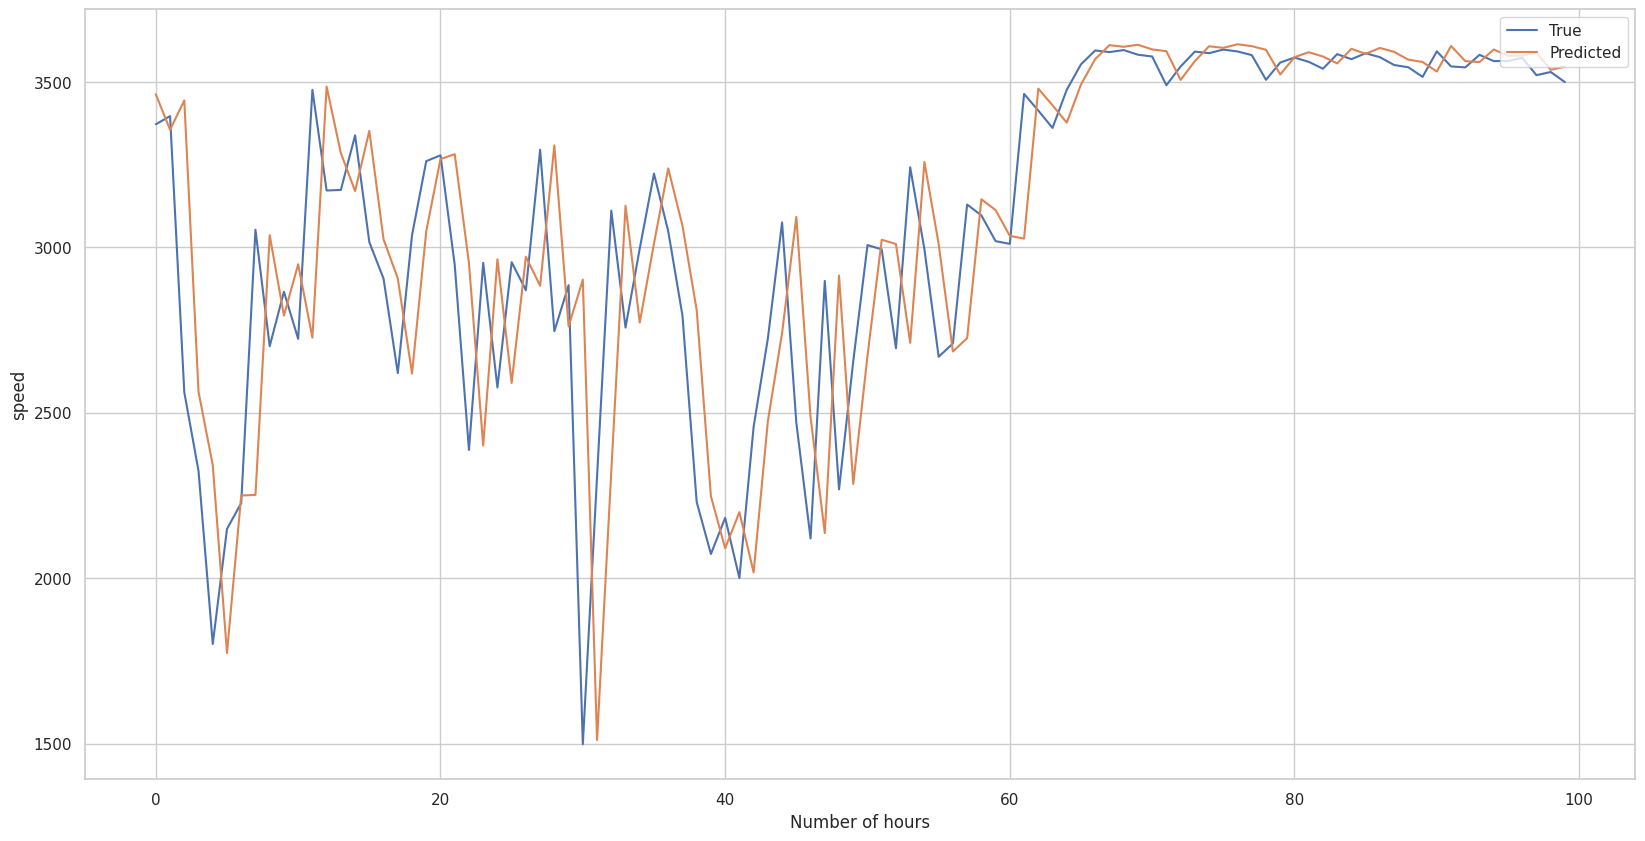

In [37]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("speed")
pyplot.show()

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming expectations and predictions are already defined as numpy arrays
expectations = np.array(expectations)
predictions = np.array(predictions)

# Calculate MSE
mse = mean_squared_error(expectations, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R^2 Score
r2 = r2_score(expectations, predictions)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 154232.67172556737
R^2 Score: 0.8598194264886888
